In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast
import itertools
import seaborn as sns
import os
import glob
import pandas as pd
import os
import re
from matplotlib.ticker import ScalarFormatter

#### Transaction Delay - avg_relays_per_builder

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_\d+\.\d+_4\.0_", f)
]


def extract_avg_rb(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_4\.0_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rb)


for folder in folders:
    avg_rb = extract_avg_rb(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()

    
    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"avg_rb_{avg_rb:.3f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:
   
    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()


final_stats['avg_relays_per_builder'] = final_stats['experiment'].str.extract(r'avg_rb_(\d+\.\d+)').astype(float)

final_stats = final_stats.sort_values(by='avg_relays_per_builder')

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
      experiment     sanctioned_type       mean        std  \
2   avg_rb_2.000  Non-sanctioned (0)  18.026904  21.922819   
3   avg_rb_2.000      Sanctioned (1)  31.058072  71.166630   
4   avg_rb_4.000  Non-sanctioned (0)  17.155240  15.481839   
5   avg_rb_4.000      Sanctioned (1)  29.286784  62.228970   
6   avg_rb_6.000  Non-sanctioned (0)  18.010556  22.100506   
7   avg_rb_6.000      Sanctioned (1)  30.826031  68.413882   
8   avg_rb_8.000  Non-sanctioned (0)  18.076032  21.238523   
9   avg_rb_8.000      Sanctioned (1)  28.877543  57.827648   
0  avg_rb_10.000  Non-sanctioned (0)  18.078923  22.331575   
1  avg_rb_10.000      Sanctioned (1)  29.584458  64.316883   

   avg_relays_per_builder  
2                     2.0  
3                     2.0  
4                     4.0  
5                     4.0  
6                     6.0  
7           

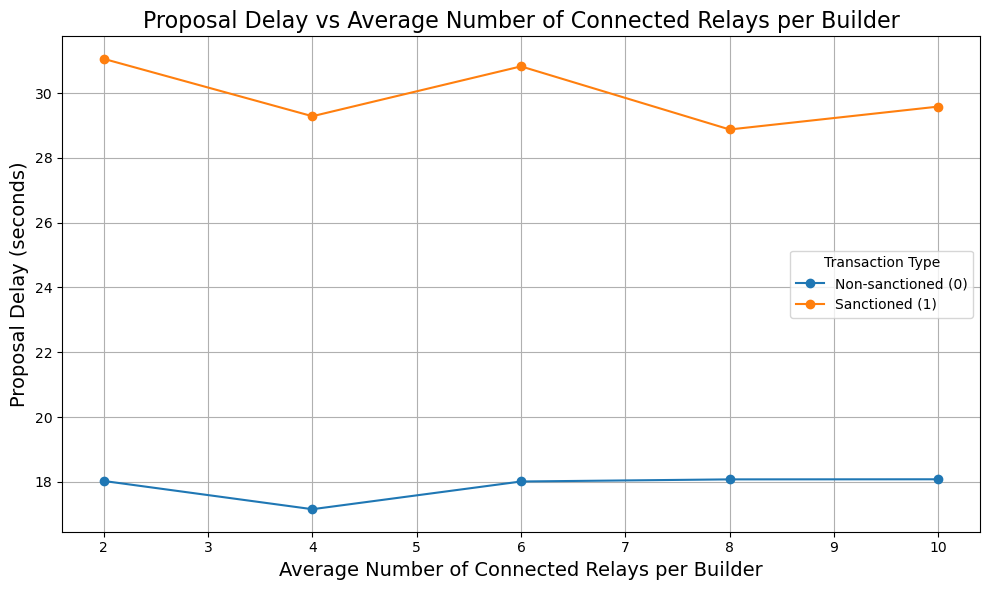

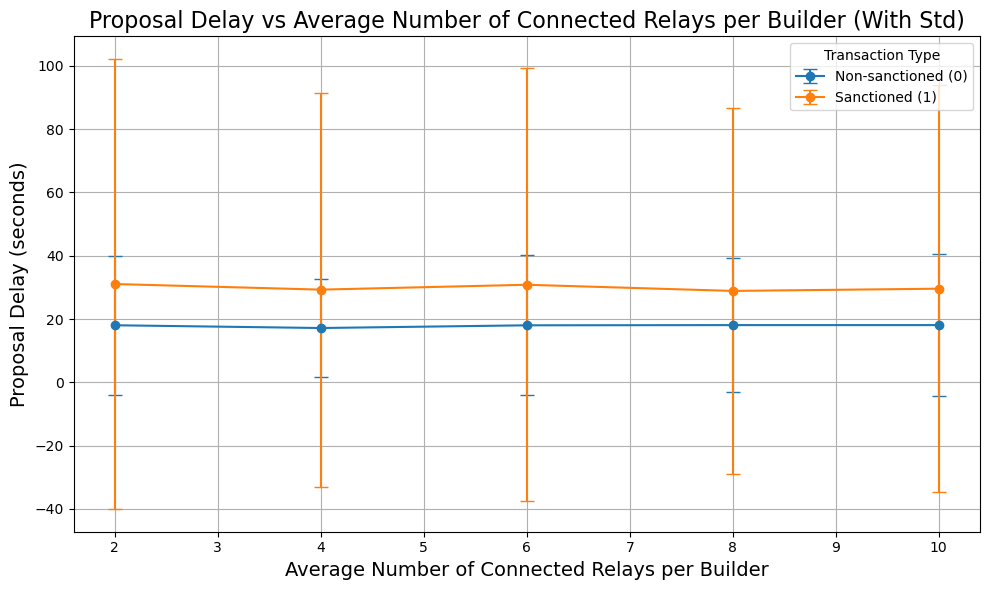

In [ ]:

# final_stats['avg_relays_per_builder'] = final_stats['experiment'].str.extract(r'avg_rb_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['avg_relays_per_builder'], group['mean'], '-o', label=label)

ax.set_xlabel('Average Number of Connected Relays per Builder', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Proposal Delay vs Average Number of Connected Relays per Builder', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['avg_relays_per_builder'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Average Number of Connected Relays per Builder', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Proposal Delay vs Average Number of Connected Relays per Builder (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


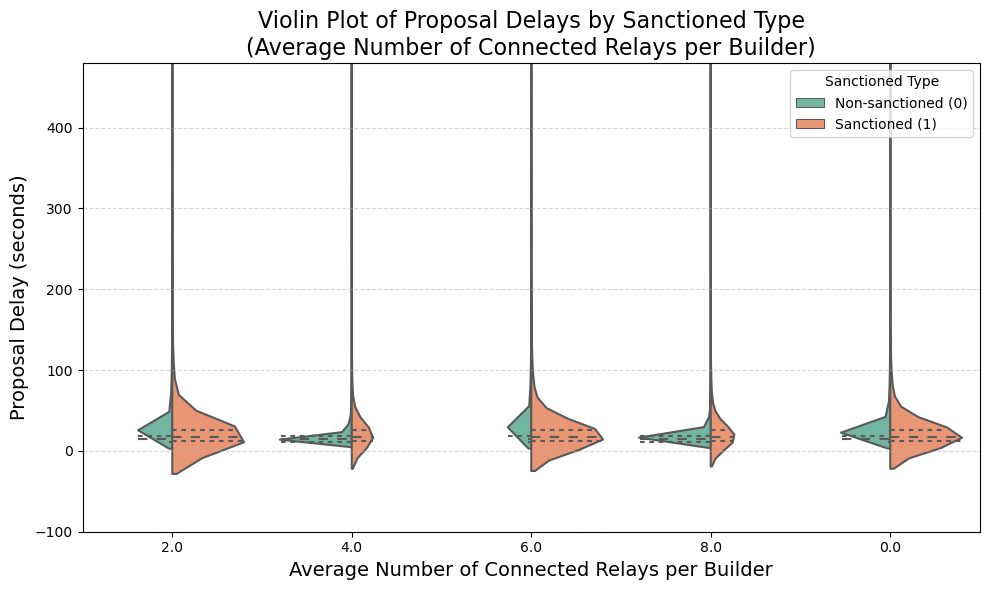

In [ ]:


plt.figure(figsize=(10, 6))

sns.violinplot(
    data=combined_transactions,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-5:]):.1f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type\n(Average Number of Connected Relays per Builder)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -  avg_relays_per_builder

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_\d+\.\d+_4\.0_", f)
]


def extract_avg_rb(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_4\.0_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rb)


results = []

for folder in folders:
    avg_rb = extract_avg_rb(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks


        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })


    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'avg_rb_{avg_rb:.3f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: avg_rb_{avg_rb:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: avg_rb_2.000
平均含 sanctioned_type=1 交易的区块数量: 139.600000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.700000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.65%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.35%
平均空区块数量: 0.700000
空区块占所有已提议区块的比例: 0.23%

Experiment: avg_rb_4.000
平均含 sanctioned_type=1 交易的区块数量: 138.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 161.400000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.15%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.85%
平均空区块数量: 0.300000
空区块占所有已提议区块的比例: 0.10%

Experiment: avg_rb_6.000
平均含 sanctioned_type=1 交易的区块数量: 137.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 162.100000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.84%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.16%
平均空区块数量: 0.700000
空区块占所有已提议区块的比例: 0.23%

Experiment: avg_rb_8.000
平均含 sanctioned_type=1 交易的区块数量: 135.900000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 163.400000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.41%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.59%
平均空区块数量: 0.700000
空区块占所有已提议区

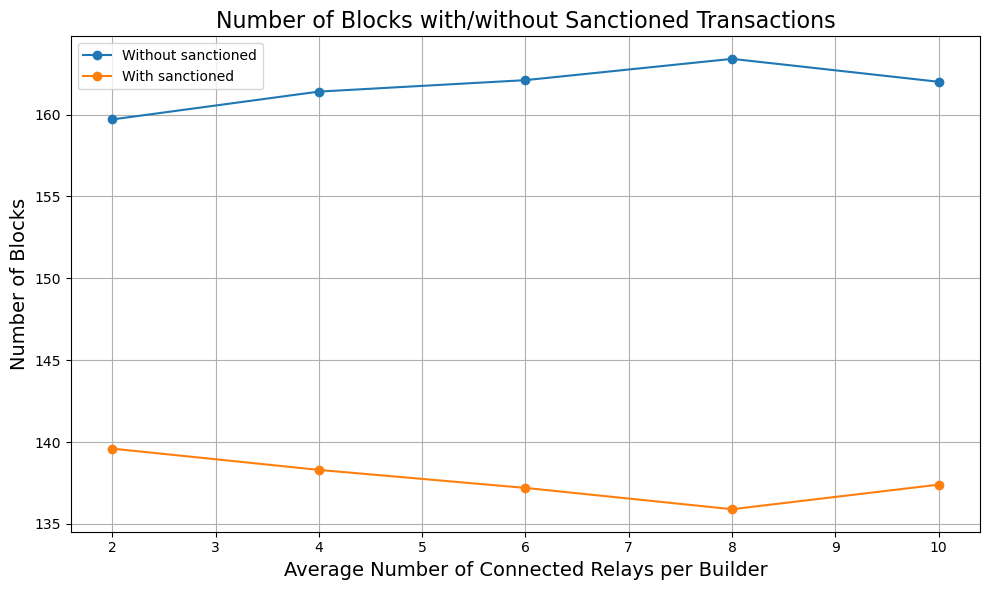

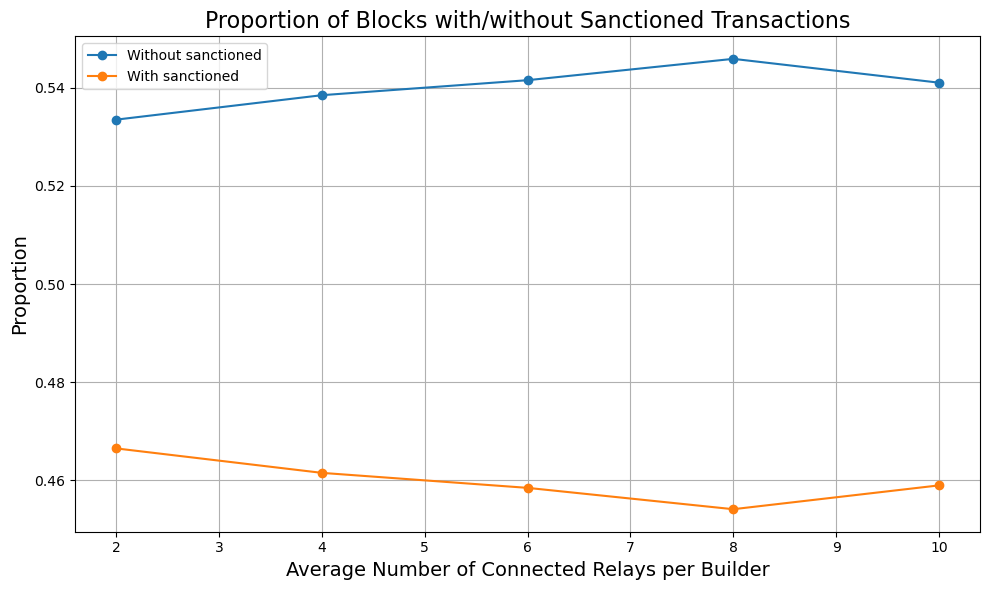

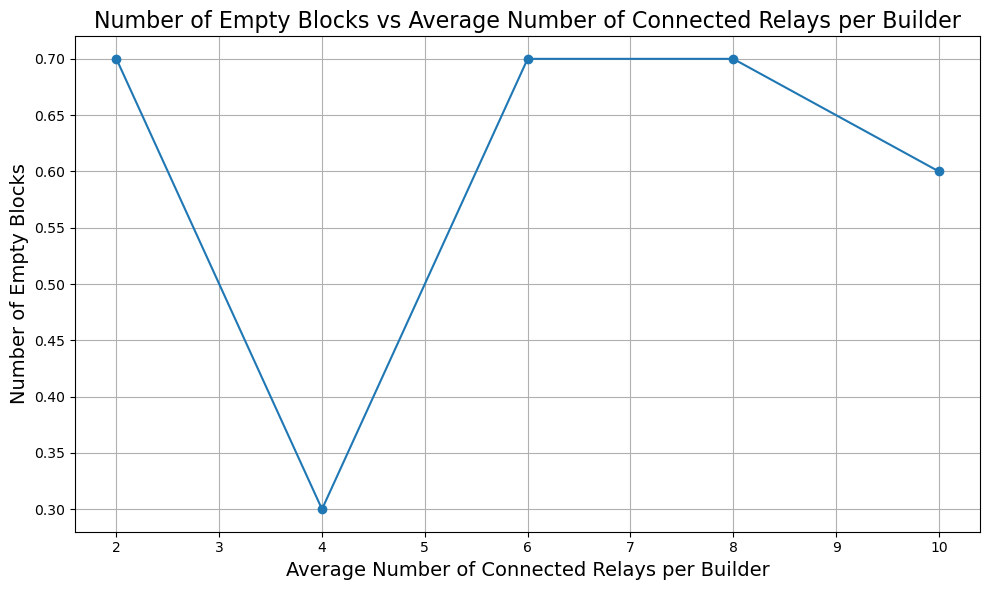

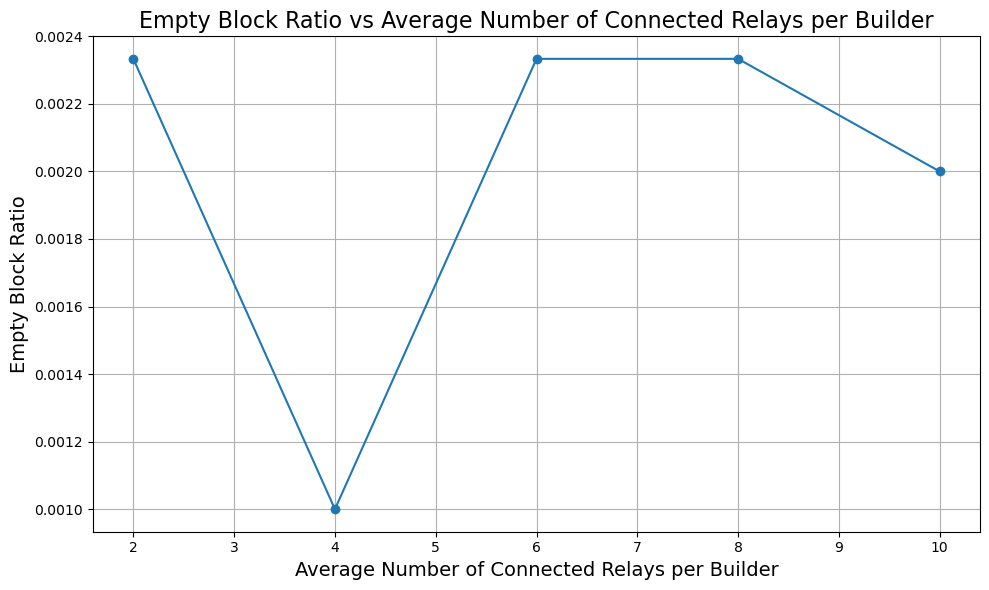

In [ ]:

results_df = pd.DataFrame(results)
results_df['avg_rb'] = results_df['experiment'].str.extract(r'avg_rb_(\d+\.\d+)').astype(float)

# Figure 1: Average number of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rb'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['avg_rb'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rb'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['avg_rb'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Average number of empty blocks
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rb'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Average Number of Connected Relays per Builder', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty block ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rb'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Average Number of Connected Relays per Builder', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### total_block_value，mean_block_value  - avg_relays_per_builder

In [ ]:

# Calculate block value statistics
def calculate_block_value_stats(exp_blocks, avg_rb):
  
    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()


    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']

 
    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()


    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'avg_rb': avg_rb,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同avg_relays_per_builder参数下的总区块价值和平均区块价值:
   avg_rb  avg_total_block_value  avg_mean_block_value  \
0     2.0           1.190831e+10          3.978809e+07   
1     4.0           1.190775e+10          3.973251e+07   
2     6.0           1.190813e+10          3.978722e+07   
3     8.0           1.190782e+10          3.978603e+07   
4    10.0           1.190838e+10          3.977489e+07   

   avg_total_block_value_eth  avg_mean_block_value_eth  
0                  11.908310                  0.039788  
1                  11.907747                  0.039733  
2                  11.908133                  0.039787  
3                  11.907816                  0.039786  
4                  11.908378                  0.039775  


/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


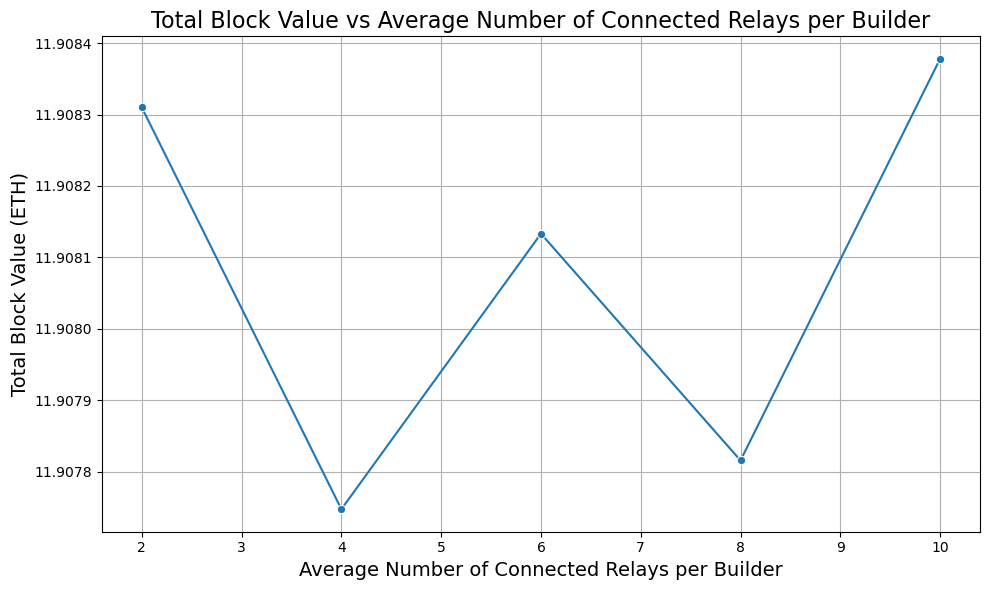

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


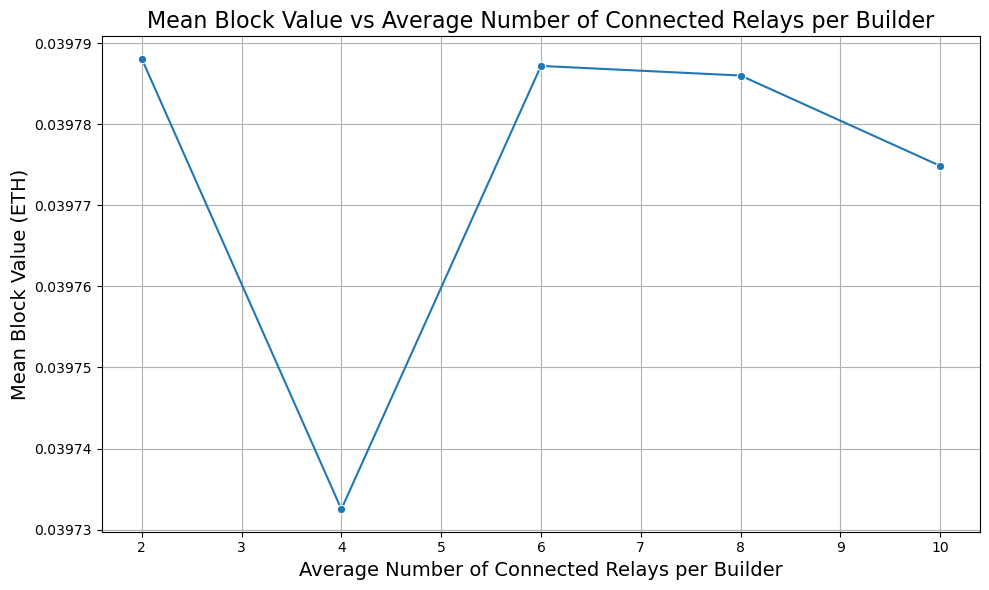

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_\d+\.\d+_4\.0_", f)
]


def extract_avg_rb(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_4\.0_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rb)


results = []


for folder in folders:
    avg_rb = extract_avg_rb(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

 
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_block_value_stats(blocks, avg_rb)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同avg_relays_per_builder参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('avg_rb'))

# Figure 1: Total block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rb', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Average Number of Connected Relays per Builder', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rb', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Average Number of Connected Relays per Builder', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types  - avg_relays_per_builder

In [ ]:
# Calculate builder profit by policy
def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
   
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

    
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

    
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()

  
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002045   
1         strict                            0.001786   
2           weak                            0.001987   
0            non                            0.002045   
1         strict                            0.001779   
2           weak                            0.002000   
0            non                            0.002038   
1         strict                            0.001811   
2           weak                            0.002013   
0            non                            0.002047   
1         strict                            0.001794   
2           weak                            0.001990   
0            non                            0.002040   
1         strict                            0.001812   
2           weak                            0.001997   

   mean_builder_profit_per_builder(ETH)     experiment  avg_rb  
0                              0.04431

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

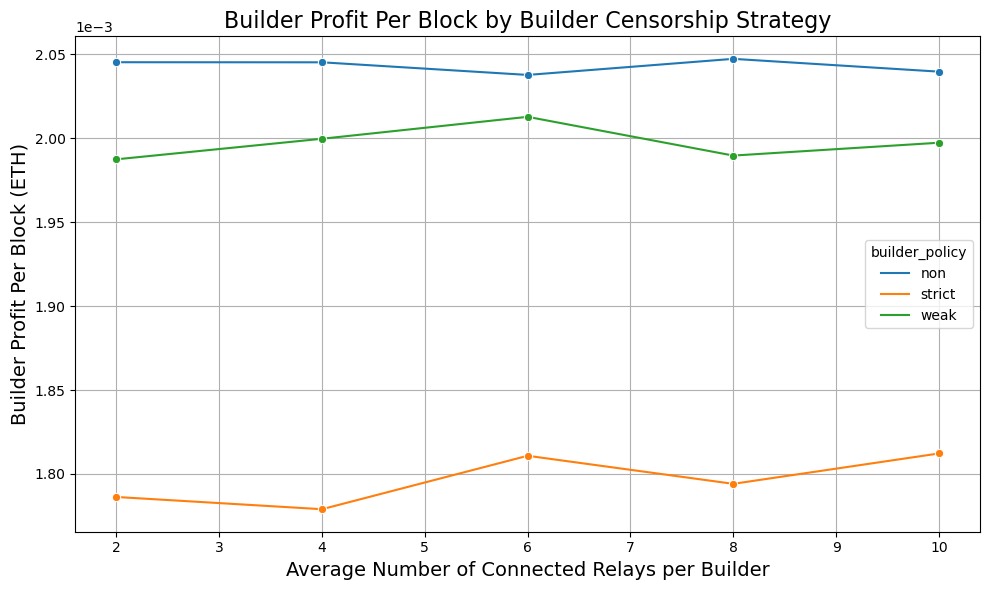

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

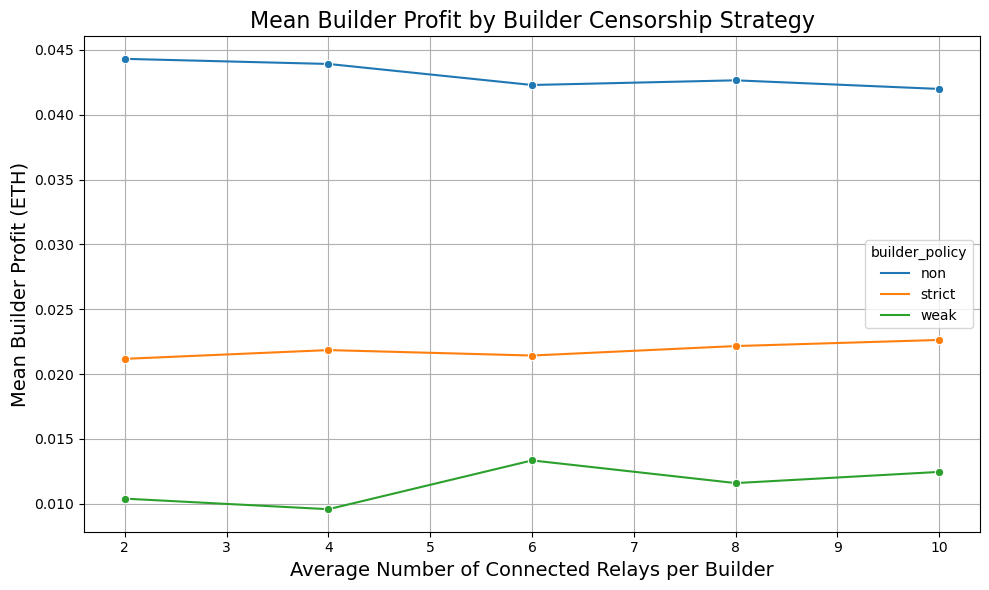

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_\d+\.\d+_4\.0_", f)
]


def extract_avg_rb(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_4\.0_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rb)


results = []

for folder in folders:
    avg_rb = extract_avg_rb(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'avg_rb_{avg_rb:.3f}')
    stats['avg_rb'] = avg_rb
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['avg_rb', 'builder_policy']))

# Figure 1: Builder profit per block by builder censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rb', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean builder profit per builder by builder censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rb', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types  - avg_relays_per_builder

In [ ]:

# Calculate validator profit by policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.039148   
1                             True                              0.032210   
0                            False                              0.039107   
1                             True                              0.032139   
0                            False                              0.039198   
1                             True                              0.032014   
0                            False                              0.039274   
1                             True                              0.031644   
0                            False                              0.039164   
1                             True                              0.032014   

   mean_validator_profit_per_validator(ETH)     experiment  avg_rb  
0                                  1.181479   avg_rb_2.000     2.0  
1                        

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

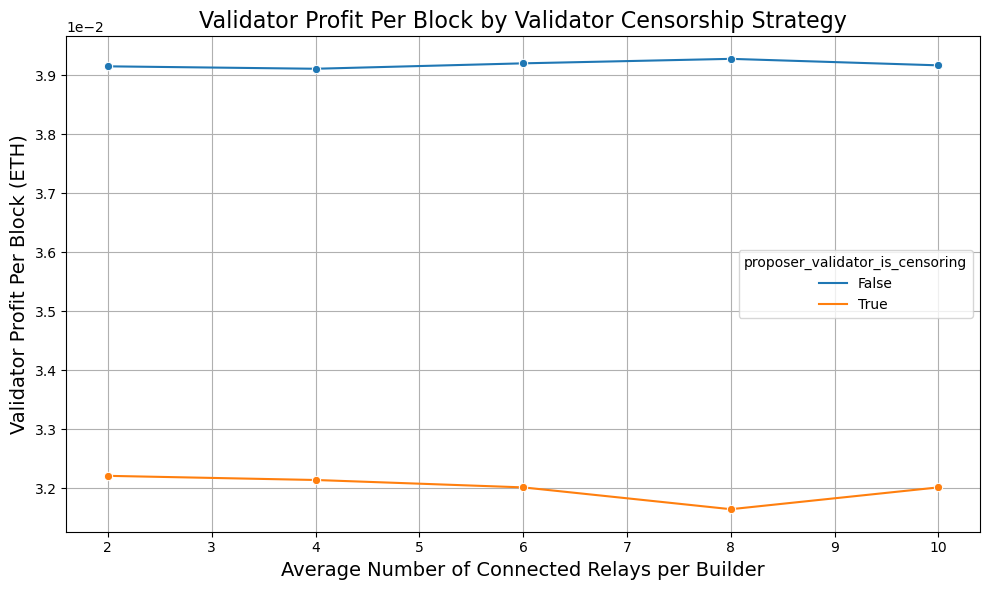

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

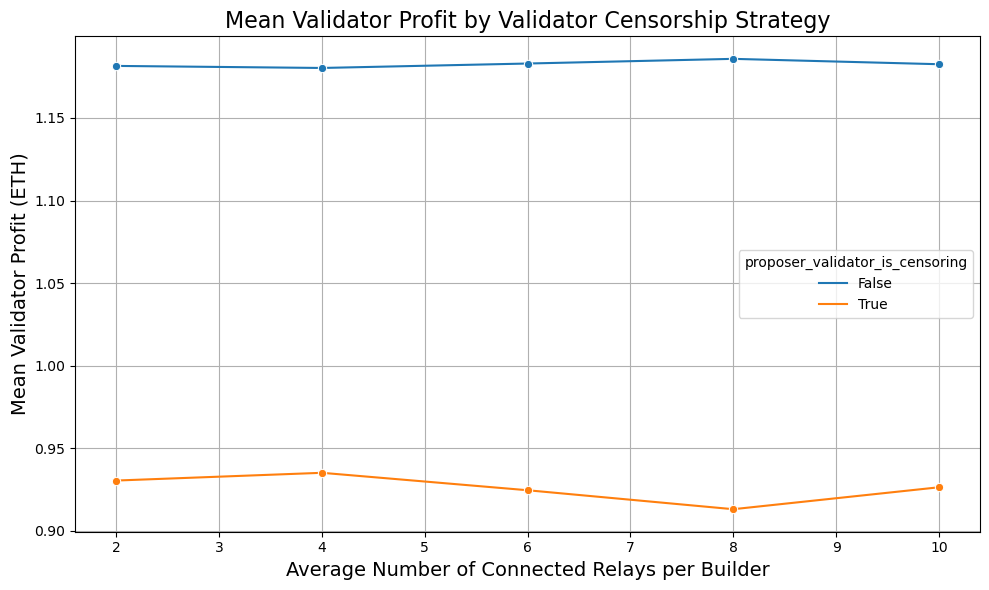

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_\d+\.\d+_4\.0_", f)
]


def extract_avg_rb(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_4\.0_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rb)


results = []

for folder in folders:
    avg_rb = extract_avg_rb(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_validator_profit_by_policy(blocks, f'avg_rb_{avg_rb:.3f}')
    stats['avg_rb'] = avg_rb
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['avg_rb', 'proposer_validator_is_censoring']))

# Figure 1：Average validator profit per block by validator censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rb', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2：Mean validator profit per validator by validator censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rb', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Transaction Delay - avg_relays_per_validator

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_4\.0_\d+\.\d+_", f)
]


def extract_avg_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_4\.0_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rv)


for folder in folders:
    avg_rv = extract_avg_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()

   
    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"avg_rv_{avg_rv:.3f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:

    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()


final_stats['avg_relays_per_validator'] = final_stats['experiment'].str.extract(r'avg_rv_(\d+\.\d+)').astype(float)

final_stats = final_stats.sort_values(by='avg_relays_per_validator')

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
      experiment     sanctioned_type       mean        std  \
2   avg_rv_2.000  Non-sanctioned (0)  18.470219  22.413160   
3   avg_rv_2.000      Sanctioned (1)  28.691023  59.748170   
4   avg_rv_4.000  Non-sanctioned (0)  17.155240  15.481839   
5   avg_rv_4.000      Sanctioned (1)  29.286784  62.228970   
6   avg_rv_6.000  Non-sanctioned (0)  18.541139  27.110813   
7   avg_rv_6.000      Sanctioned (1)  30.539604  63.671026   
8   avg_rv_8.000  Non-sanctioned (0)  18.788614  27.904451   
9   avg_rv_8.000      Sanctioned (1)  34.718172  86.797682   
0  avg_rv_10.000  Non-sanctioned (0)  17.285411  16.617036   
1  avg_rv_10.000      Sanctioned (1)  28.414440  59.487465   

   avg_relays_per_validator  
2                       2.0  
3                       2.0  
4                       4.0  
5                       4.0  
6                       6.0  


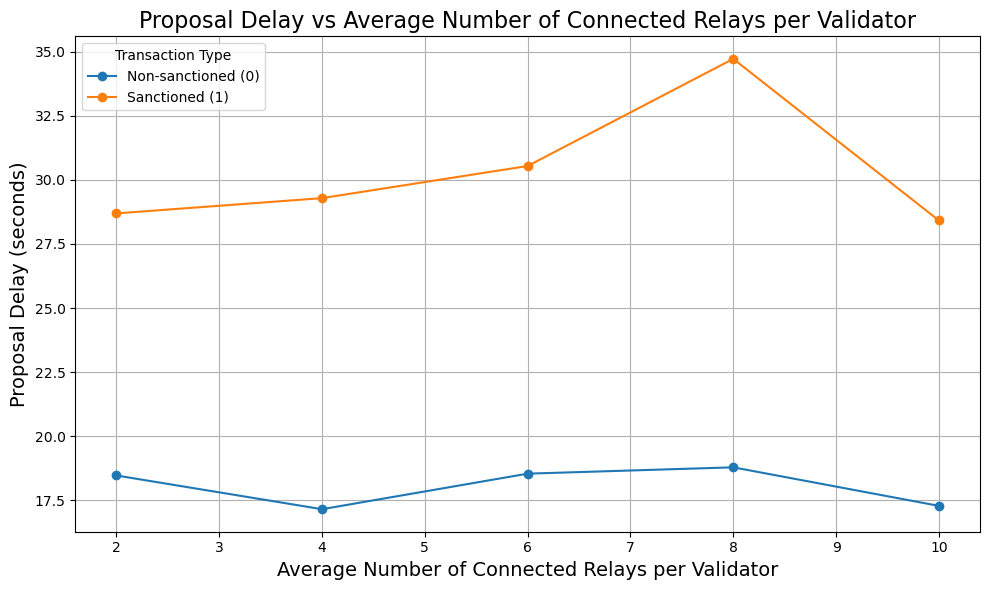

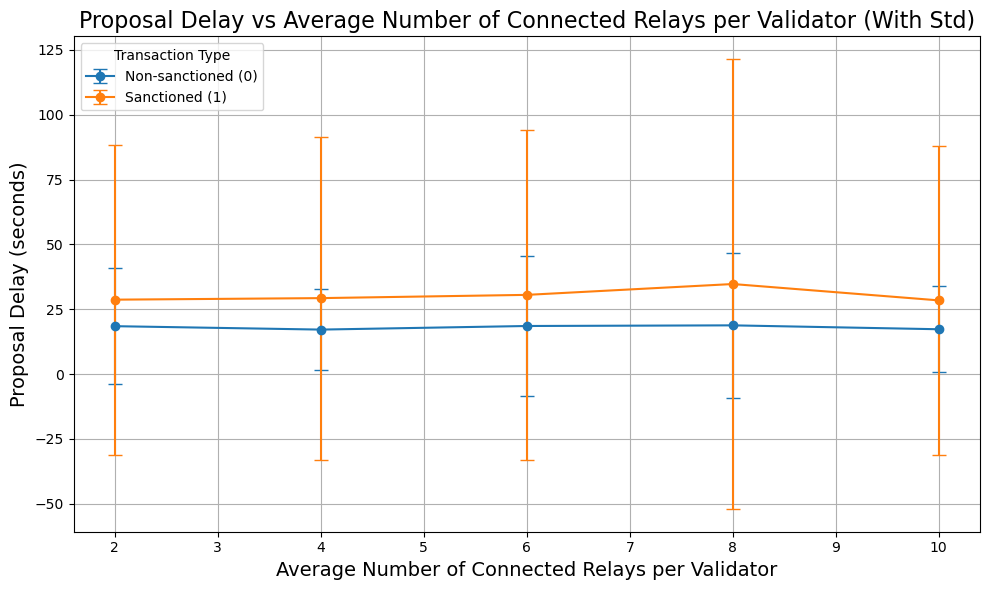

In [ ]:

# final_stats['avg_relays_per_validator'] = final_stats['experiment'].str.extract(r'avg_rv_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['avg_relays_per_validator'], group['mean'], '-o', label=label)

ax.set_xlabel('Average Number of Connected Relays per Validator', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Proposal Delay vs Average Number of Connected Relays per Validator', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['avg_relays_per_validator'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Average Number of Connected Relays per Validator', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Proposal Delay vs Average Number of Connected Relays per Validator (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


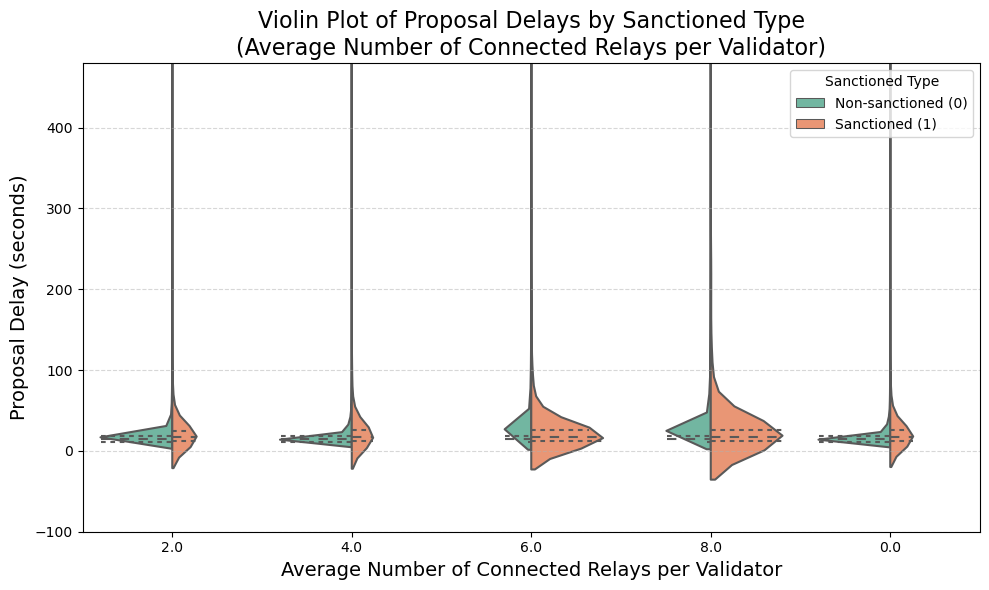

In [ ]:


plt.figure(figsize=(10, 6))

sns.violinplot(
    data=combined_transactions,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-5:]):.1f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type\n(Average Number of Connected Relays per Validator)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -   avg_relays_per_validator

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_4\.0_\d+\.\d+_", f)
]


def extract_avg_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_4\.0_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rv)


results = []

for folder in folders:
    avg_rv = extract_avg_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks


        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })


    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'avg_rv_{avg_rv:.3f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: avg_rv_{avg_rv:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: avg_rv_2.000
平均含 sanctioned_type=1 交易的区块数量: 142.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 156.400000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 47.71%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 52.29%
平均空区块数量: 0.900000
空区块占所有已提议区块的比例: 0.30%

Experiment: avg_rv_4.000
平均含 sanctioned_type=1 交易的区块数量: 138.300000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 161.400000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.15%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.85%
平均空区块数量: 0.300000
空区块占所有已提议区块的比例: 0.10%

Experiment: avg_rv_6.000
平均含 sanctioned_type=1 交易的区块数量: 138.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.36%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.64%
平均空区块数量: 0.800000
空区块占所有已提议区块的比例: 0.27%

Experiment: avg_rv_8.000
平均含 sanctioned_type=1 交易的区块数量: 137.900000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.15%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.85%
平均空区块数量: 1.200000
空区块占所有已提议区

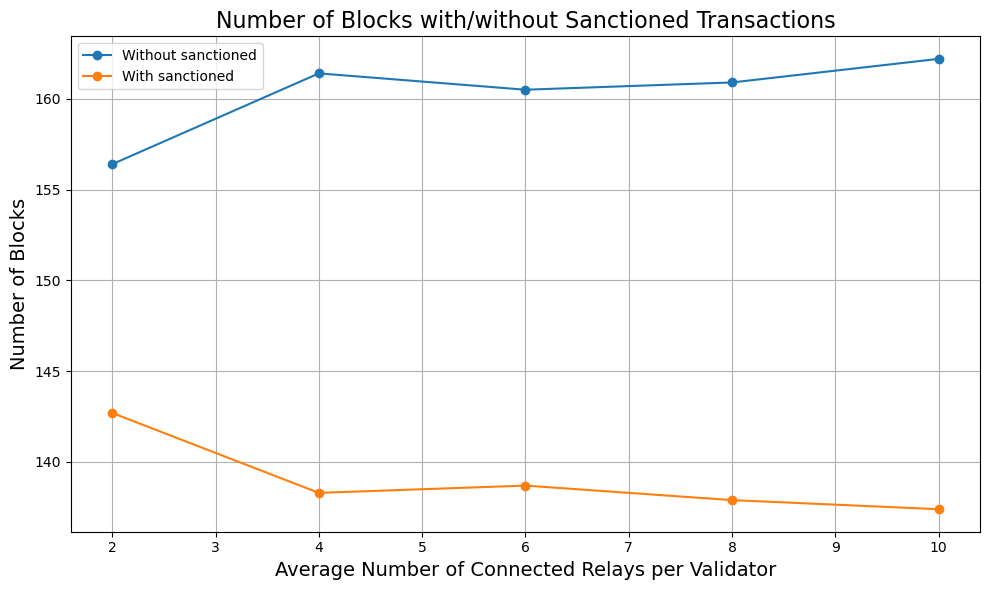

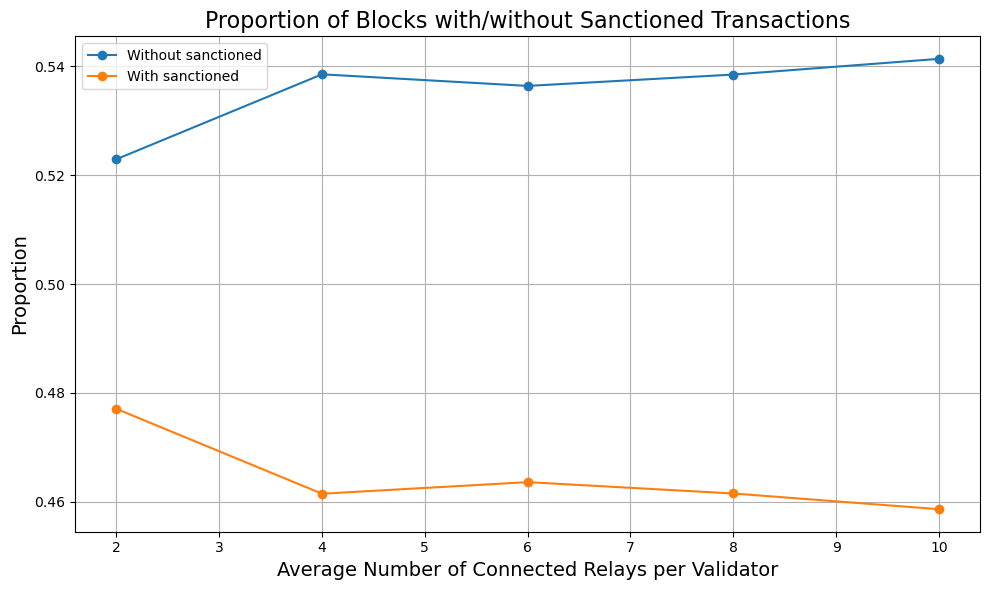

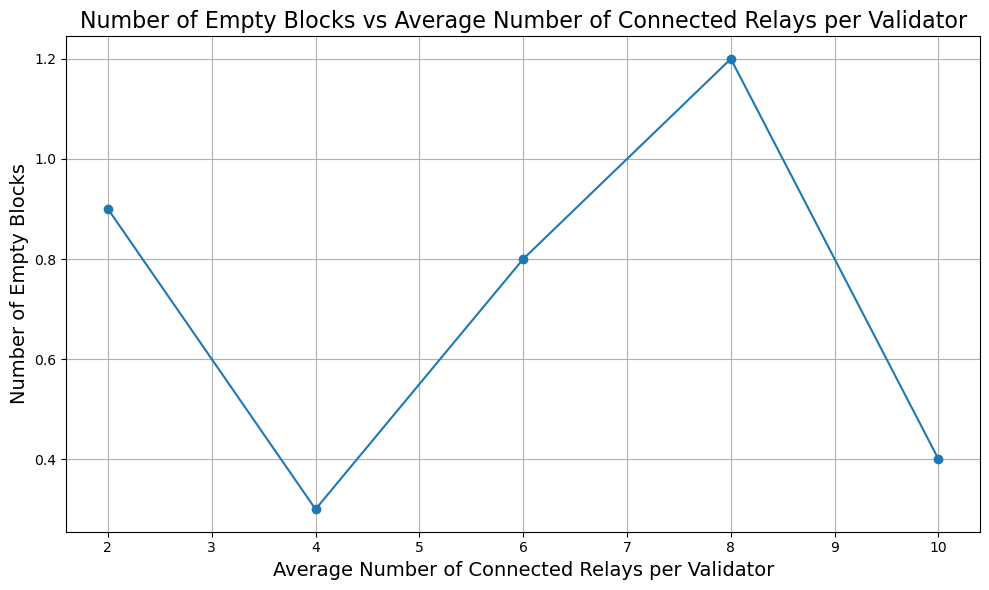

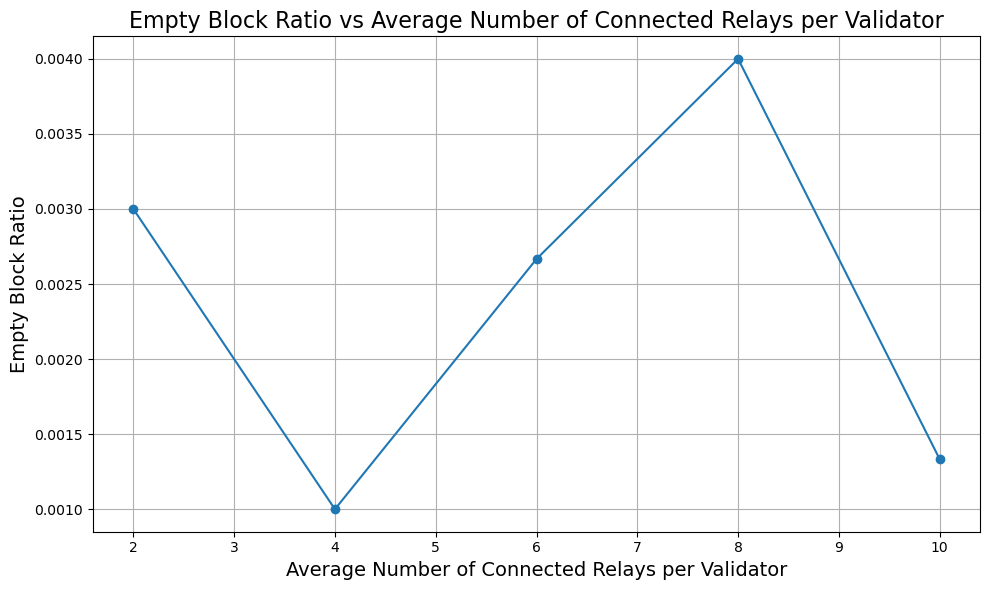

In [ ]:

results_df = pd.DataFrame(results)
results_df['avg_rv'] = results_df['experiment'].str.extract(r'avg_rv_(\d+\.\d+)').astype(float)

# Figure 1: Average number of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rv'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['avg_rv'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rv'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['avg_rv'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Average number of empty blocks
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rv'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Average Number of Connected Relays per Validator', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty block ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['avg_rv'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Average Number of Connected Relays per Validator', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### total_block_value，mean_block_value  - avg_relays_per_validator

In [ ]:

# Calculate block value statistics
def calculate_block_value_stats(exp_blocks, avg_rv):
    
    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()

    
    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']

   
    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()

   
    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'avg_rv': avg_rv,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同avg_relays_per_validator参数下的总区块价值和平均区块价值:
   avg_rv  avg_total_block_value  avg_mean_block_value  \
0     2.0           1.190815e+10          3.981527e+07   
1     4.0           1.190775e+10          3.973251e+07   
2     6.0           1.190829e+10          3.980116e+07   
3     8.0           1.190769e+10          3.985243e+07   
4    10.0           1.190774e+10          3.974574e+07   

   avg_total_block_value_eth  avg_mean_block_value_eth  
0                  11.908153                  0.039815  
1                  11.907747                  0.039733  
2                  11.908288                  0.039801  
3                  11.907694                  0.039852  
4                  11.907739                  0.039746  


/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


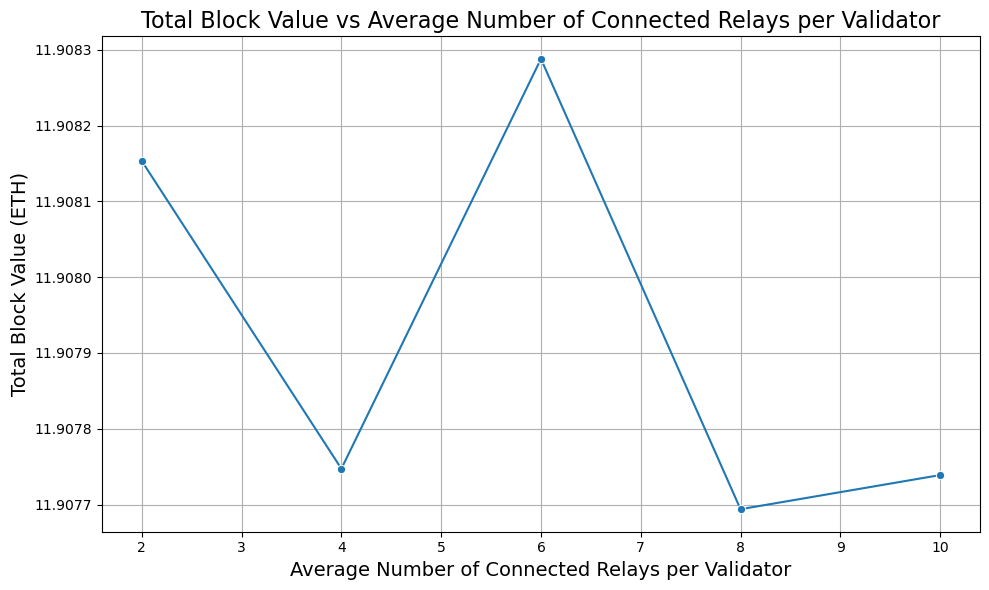

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


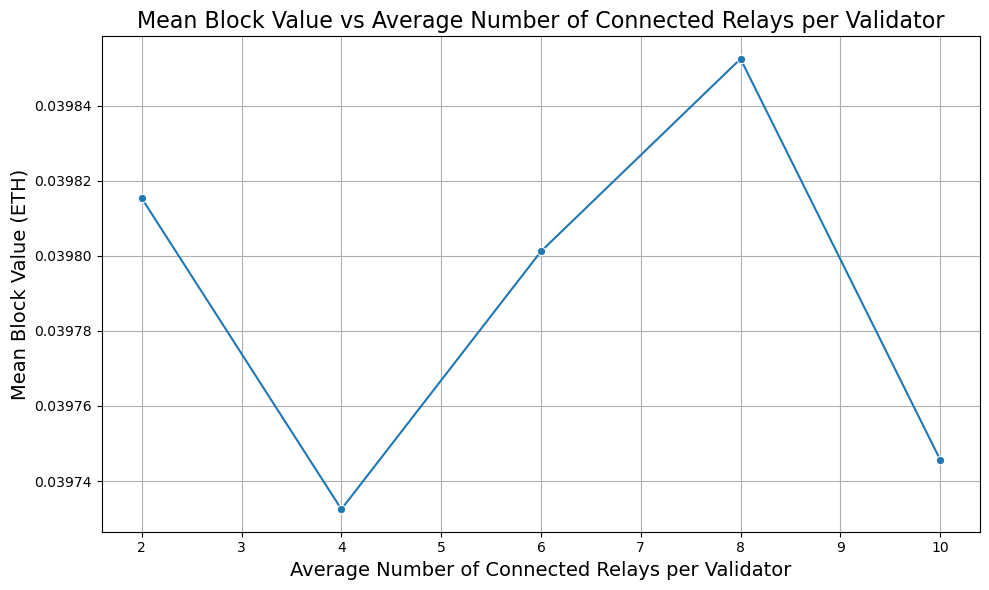

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_4\.0_\d+\.\d+_", f)
]


def extract_avg_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_4\.0_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rv)


results = []


for folder in folders:
    avg_rv = extract_avg_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_block_value_stats(blocks, avg_rv)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同avg_relays_per_validator参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('avg_rv'))

# Figure 1: Total block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rv', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Average Number of Connected Relays per Validator', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rv', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Average Number of Connected Relays per Validator', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types - avg_relays_per_validator

In [ ]:
# Calculate builder profit by policy
def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
  
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()


    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

  
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()

 
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002049   
1         strict                            0.001756   
2           weak                            0.001921   
0            non                            0.002045   
1         strict                            0.001779   
2           weak                            0.002000   
0            non                            0.002038   
1         strict                            0.001801   
2           weak                            0.002051   
0            non                            0.002043   
1         strict                            0.001808   
2           weak                            0.002019   
0            non                            0.002042   
1         strict                            0.001805   
2           weak                            0.002005   

   mean_builder_profit_per_builder(ETH)     experiment  avg_rv  
0                              0.04686

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

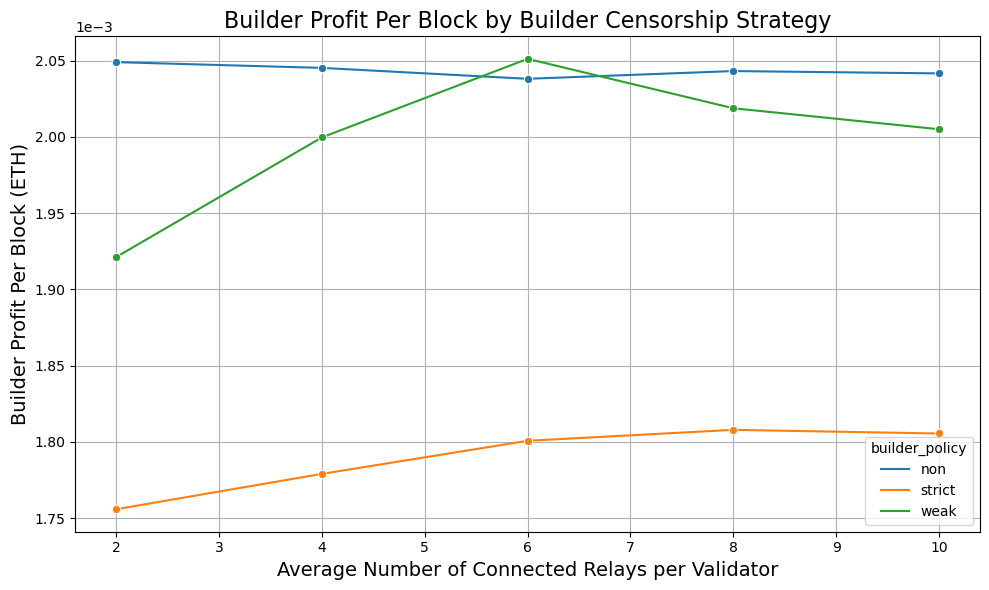

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

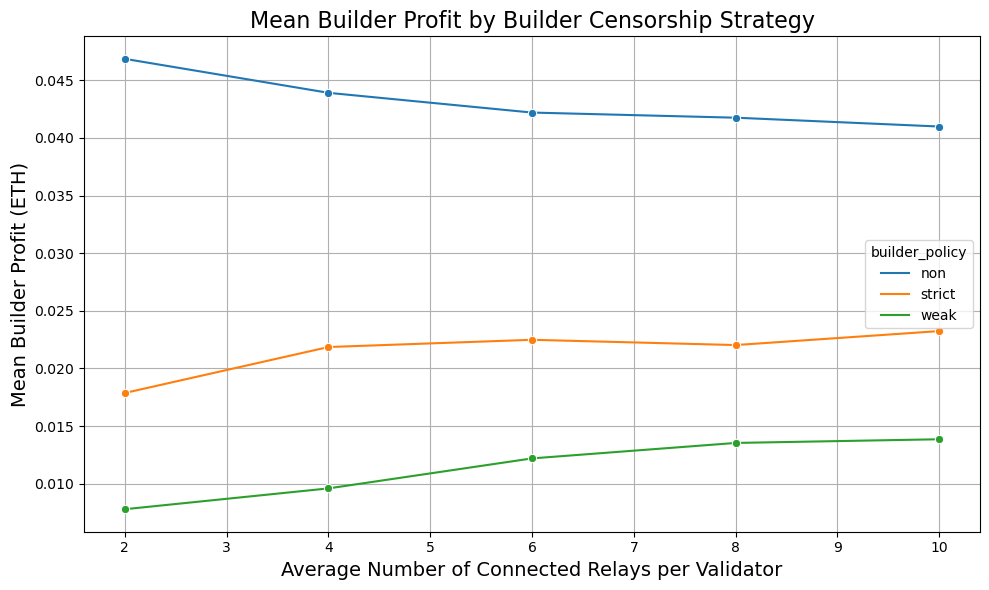

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_4\.0_\d+\.\d+_", f)
]


def extract_avg_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_4\.0_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rv)


results = []


for folder in folders:
    avg_rv = extract_avg_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'avg_rv_{avg_rv:.3f}')
    stats['avg_rv'] = avg_rv
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['avg_rv', 'builder_policy']))

# Figure 1: Average builder profit per block by builder censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rv', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean builder profit per builder by builder censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rv', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types   - avg_relays_per_validator

In [ ]:

# Calculate validator profit by policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.039183   
1                             True                              0.032202   
0                            False                              0.039107   
1                             True                              0.032139   
0                            False                              0.039211   
1                             True                              0.031984   
0                            False                              0.039236   
1                             True                              0.032093   
0                            False                              0.039117   
1                             True                              0.032131   

   mean_validator_profit_per_validator(ETH)     experiment  avg_rv  
0                                  1.182479   avg_rv_2.000     2.0  
1                        

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

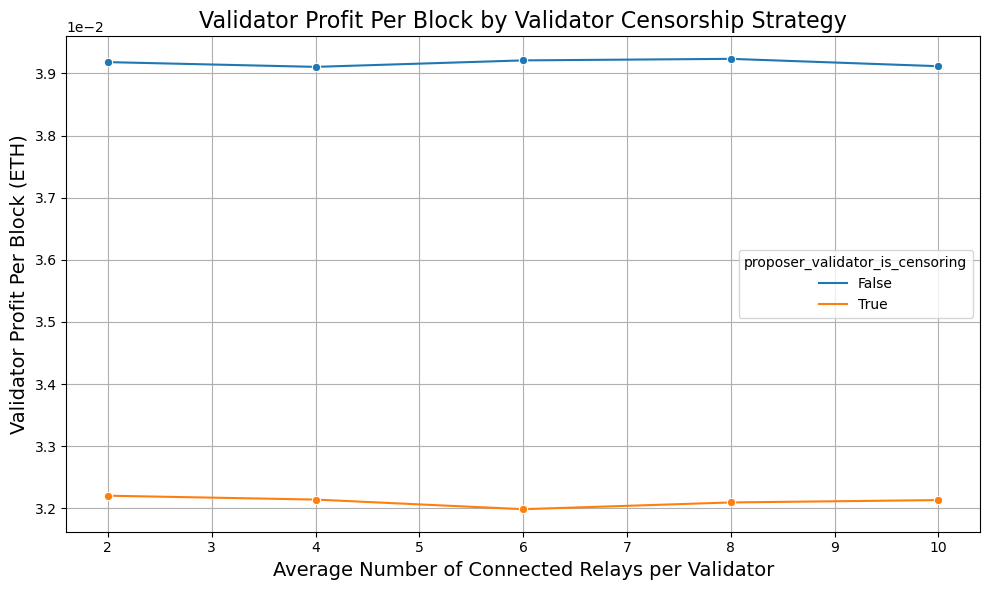

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

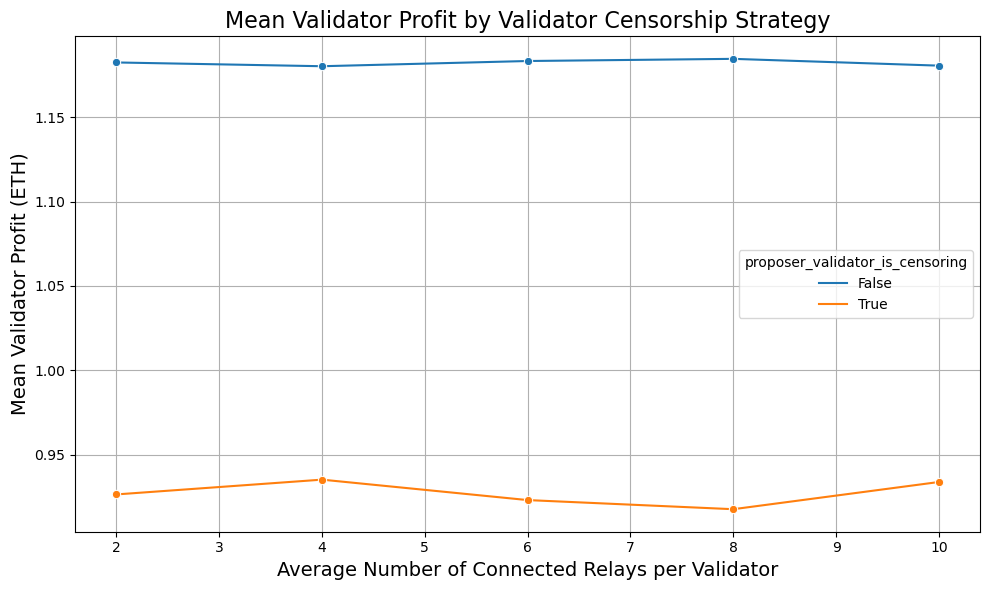

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"avg_relays_per_builder_validator_4\.0_\d+\.\d+_", f)
]


def extract_avg_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_4\.0_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_avg_rv)


results = []


for folder in folders:
    avg_rv = extract_avg_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_validator_profit_by_policy(blocks, f'avg_rv_{avg_rv:.3f}')
    stats['avg_rv'] = avg_rv
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['avg_rv', 'proposer_validator_is_censoring']))

# Figure 1: Average validator profit per block by validator censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rv', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean validator profit per validator by validator censorship strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='avg_rv', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Average Number of Connected Relays per Validator', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Two factor analysis - avg_relays_per_builder & avg_relays_per_validator

#### Transaction Delay - avg_relays_per_builder & avg_relays_per_validator

In [ ]:



base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("avg_relays_per_builder_validator_")]


def extract_avg_rb_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        avg_rb = float(match.group(1))
        avg_rv = float(match.group(2))
        return (avg_rb, avg_rv)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_avg_rb_rv)


for folder in folders:
    avg_rb, avg_rv = extract_avg_rb_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()
    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})


    transactions['experiment'] = f"avg_rb_{avg_rb:.3f}_avg_rv_{avg_rv:.3f}"
    transactions['avg_rb'] = avg_rb
    transactions['avg_rv'] = avg_rv

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
print("Transactions with negative proposal delay:")
print(negative_delay_txs)


run_stats = combined_transactions.groupby(['avg_rb', 'avg_rv', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()

final_stats = run_stats.groupby(['avg_rb', 'avg_rv', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Average Number of Connected Relays per Builder/Validator and Sanctioned Type (averaged by run_id):")
# print(final_stats)

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

display(final_stats)

Transactions with negative proposal delay:
Empty DataFrame
Columns: [run_id, tx_id, arrival_time, transaction_type, sanctioned_type, gas_used, base_fee_per_gas, priority_fee_per_gas, priority_fee, gas_fee, proposed_block_id, proposed_builder_id, proposed_builder_policy, selected_relay_id, selected_relay_policy, proposer_validator_id, proposer_validator_is_censoring, proposed_time, confirmed_time, is_proposed, is_confirmed, proposal_delay, experiment, avg_rb, avg_rv]
Index: []

[0 rows x 25 columns]

Proposal Delay Statistics by Average Number of Connected Relays per Builder/Validator and Sanctioned Type (averaged by run_id):


avg_rb  avg_rv     sanctioned_type       mean        std
0      2.0     2.0  Non-sanctioned (0)  19.844733  33.920207
1      2.0     2.0      Sanctioned (1)  32.666835  78.685060
2      2.0     4.0  Non-sanctioned (0)  18.026904  21.922819
3      2.0     4.0      Sanctioned (1)  31.058072  71.166630
4      2.0     6.0  Non-sanctioned (0)  17.901627  20.645835
5      2.0     6.0      Sanctioned (1)  30.653390  67.469788
6      2.0     8.0  Non-sanctioned (0)  18.965845  29.765784
7      2.0     8.0      Sanctioned (1)  32.006383  78.964050
8      2.0    10.0  Non-sanctioned (0)  17.193488  15.822949
9      2.0    10.0      Sanctioned (1)  27.522521  53.493393
10     4.0     2.0  Non-sanctioned (0)  18.470219  22.413160
11     4.0     2.0      Sanctioned (1)  28.691023  59.748170
12     4.0     4.0  Non-sanctioned (0)  17.155240  15.481839
13     4.0     4.0      Sanctioned (1)  29.286784  62.228970
14     4.0     6.0  Non-sanctioned (0)  18.541139  27.110813
15     4.0     6.0      Sanctioned (1)  30.539604  63.671026
16     4.0     8.0  Non-sanctioned (0)  18.788614  27.904451
17     4.0     8.0      Sanctioned (1)  34.718172  86.797682
18     4.0    10.0  Non-sanctioned (0)  17.285411  16.617036
19     4.0    10.0      Sanctioned (1)  28.414440  59.487465
20     6.0     2.0  Non-sanctioned (0)  18.746836  28.244872
21     6.0     2.0      Sanctioned (1)  29.961992  61.471111
22     6.0     4.0  Non-sanctioned (0)  18.010556  22.100506
23     6.0     4.0      Sanctioned (1)  30.826031  68.413882
24     6.0     6.0  Non-sanctioned (0)  18.829001  27.462275
25     6.0     6.0      Sanctioned (1)  32.352214  78.063571
26     6.0     8.0  Non-sanctioned (0)  17.929249  21.923251
27     6.0     8.0      Sanctioned (1)  29.705389  60.238719
28     6.0    10.0  Non-sanctioned (0)  17.485475  17.450519
29     6.0    10.0      Sanctioned (1)  30.946175  71.075324
30     8.0     2.0  Non-sanctioned (0)  17.898162  19.012429
31     8.0     2.0      Sanctioned (1)  30.540962  68.236644
32     8.0     4.0  Non-sanctioned (0)  18.076032  21.238523
33     8.0     4.0      Sanctioned (1)  28.877543  57.827648
34     8.0     6.0  Non-sanctioned (0)  18.064745  21.226725
35     8.0     6.0      Sanctioned (1)  30.808477  67.076378
36     8.0     8.0  Non-sanctioned (0)  18.828584  28.265496
37     8.0     8.0      Sanctioned (1)  32.608681  73.826906
38     8.0    10.0  Non-sanctioned (0)  17.498365  17.278402
39     8.0    10.0      Sanctioned (1)  30.276616  68.097258
40    10.0     2.0  Non-sanctioned (0)  18.121639  22.598483
41    10.0     2.0      Sanctioned (1)  30.031847  67.137531
42    10.0     4.0  Non-sanctioned (0)  18.078923  22.331575
43    10.0     4.0      Sanctioned (1)  29.584458  64.316883
44    10.0     6.0  Non-sanctioned (0)  18.502576  24.622545
45    10.0     6.0      Sanctioned (1)  32.573539  74.694432
46    10.0     8.0  Non-sanctioned (0)  17.999349  20.892355
47    10.0     8.0      Sanctioned (1)  32.341016  76.960706
48    10.0    10.0  Non-sanctioned (0)  17.889280  20.669706
49    10.0    10.0      Sanctioned (1)  30.340582  66.868471

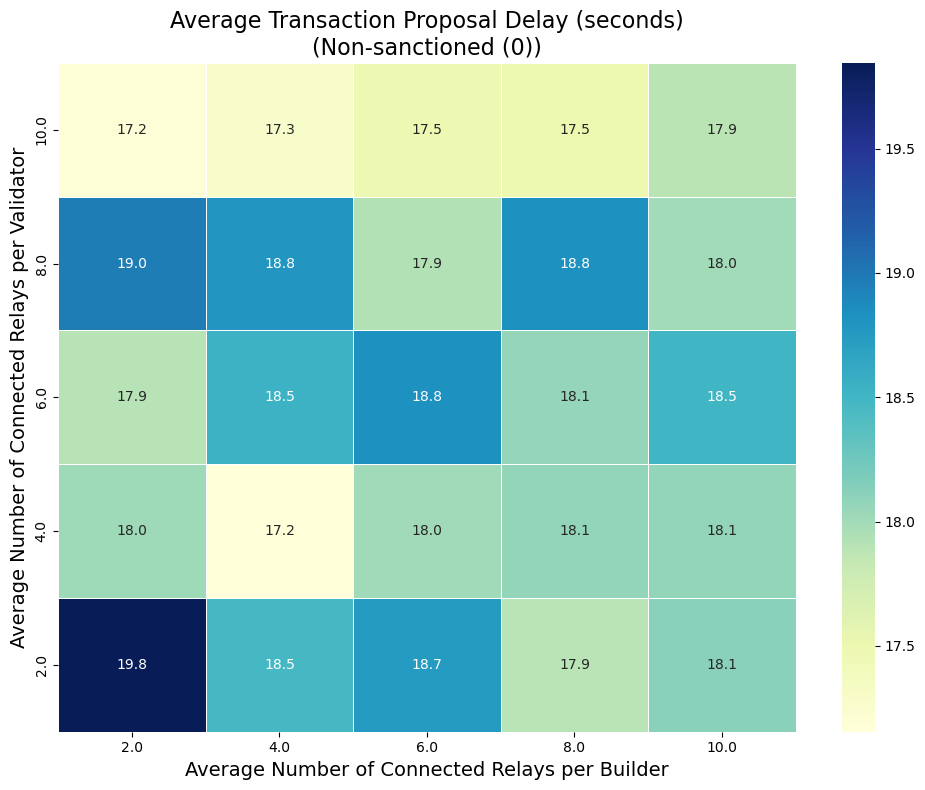

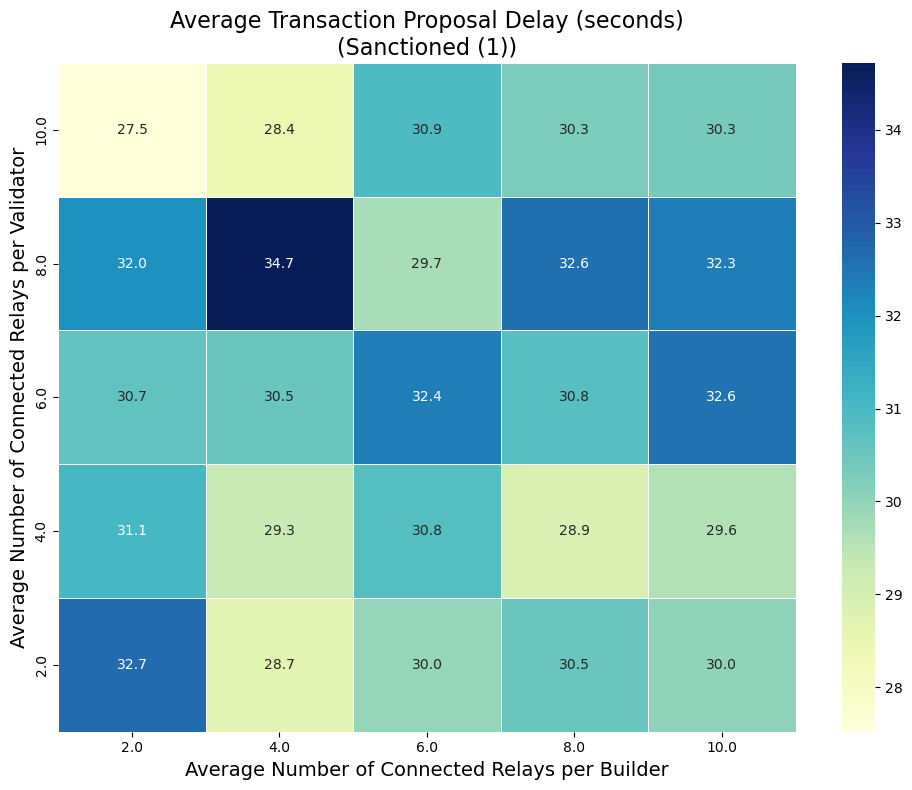

In [ ]:

full_avg_rb = sorted(final_stats['avg_rb'].unique())
full_avg_rv = sorted(final_stats['avg_rv'].unique())

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    heatmap_data = subset.pivot(index='avg_rv', columns='avg_rb', values='mean').reindex(index=full_avg_rv, columns=full_avg_rb)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        linewidths=.5,
        # cbar_kws={'label': 'Mean Proposal Delay (s)'},
        mask=heatmap_data.isnull(),  
    )


    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            if pd.isna(heatmap_data.iloc[i, j]):
                ax.text(
                    j + 0.5, i + 0.5, 'N/A',
                    ha='center', va='center', color='grey'
                )


    ax.invert_yaxis()

    plt.title(f'Average Transaction Proposal Delay (seconds)\n({sanctioned_type})', fontsize=16)
    plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
    plt.ylabel('Average Number of Connected Relays per Validator', fontsize=14)
    
    plt.tight_layout()
    plt.show()


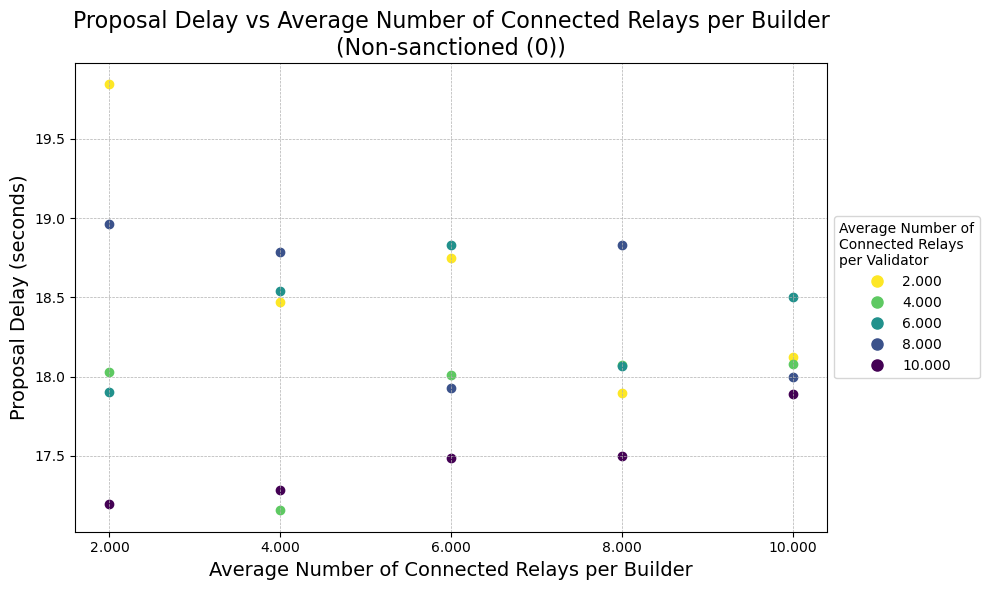

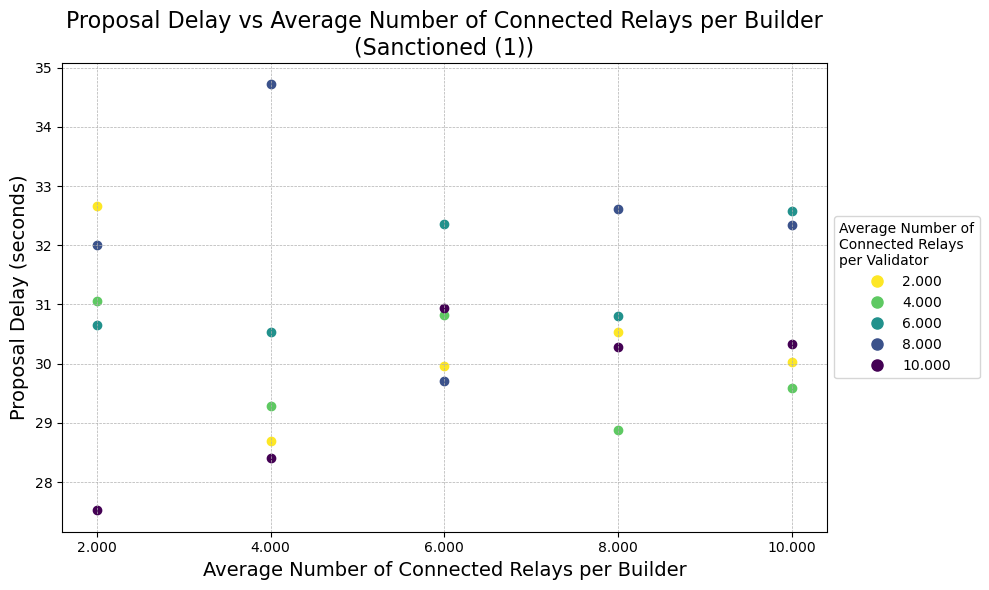

In [ ]:


avg_rv_values = sorted(final_stats['avg_rv'].unique())
colors = plt.cm.viridis(np.linspace(1, 0, len(avg_rv_values)))  

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    fig, ax = plt.subplots(figsize=(10, 6))


    unique_avg_rb = sorted(subset['avg_rb'].unique())
    avg_rb_to_pos = {avg: pos for pos, avg in enumerate(unique_avg_rb)}


    for i, avg_rv in enumerate(avg_rv_values):
        data = subset[subset['avg_rv'] == avg_rv]
        positions = [avg_rb_to_pos[bt] for bt in data['avg_rb']]
        ax.scatter(positions, data['mean'],
                   color=colors[i], marker='o', label=f'{avg_rv:.3f}', alpha=1.0)

    ax.set_xlabel('Average Number of Connected Relays per Builder', fontsize=14)
    ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)


    ax.set_xticks(range(len(unique_avg_rb)))
    ax.set_xticklabels([f'{x:.3f}' for x in unique_avg_rb])


    legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=8, label=f'{avg_rv:.3f}')
                       for i, avg_rv in enumerate(avg_rv_values)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Average Number of\nConnected Relays\nper Validator')

    plt.title(f'Proposal Delay vs Average Number of Connected Relays per Builder\n({sanctioned_type})', fontsize=16)
    plt.tight_layout()
    plt.show()

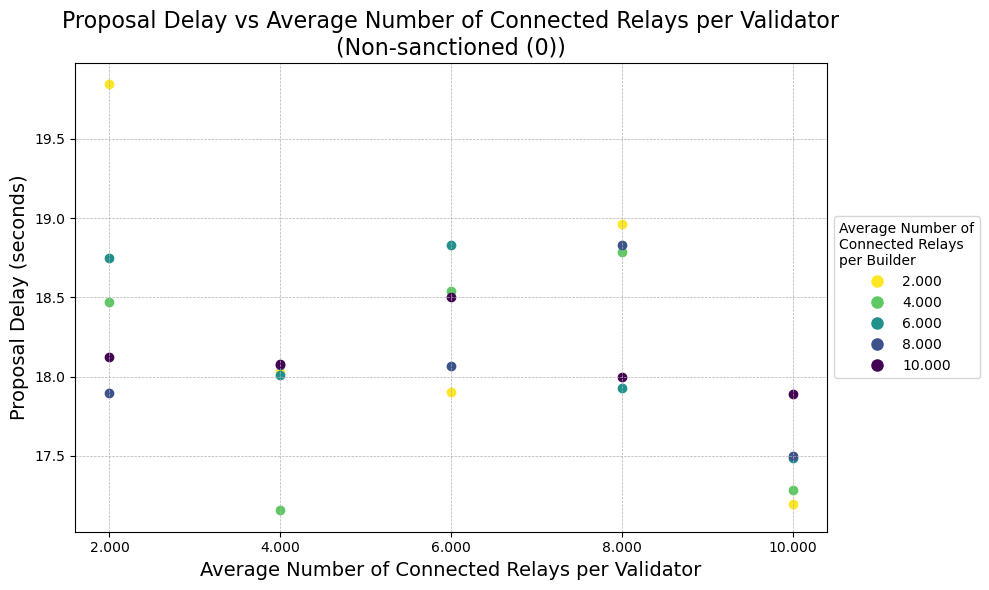

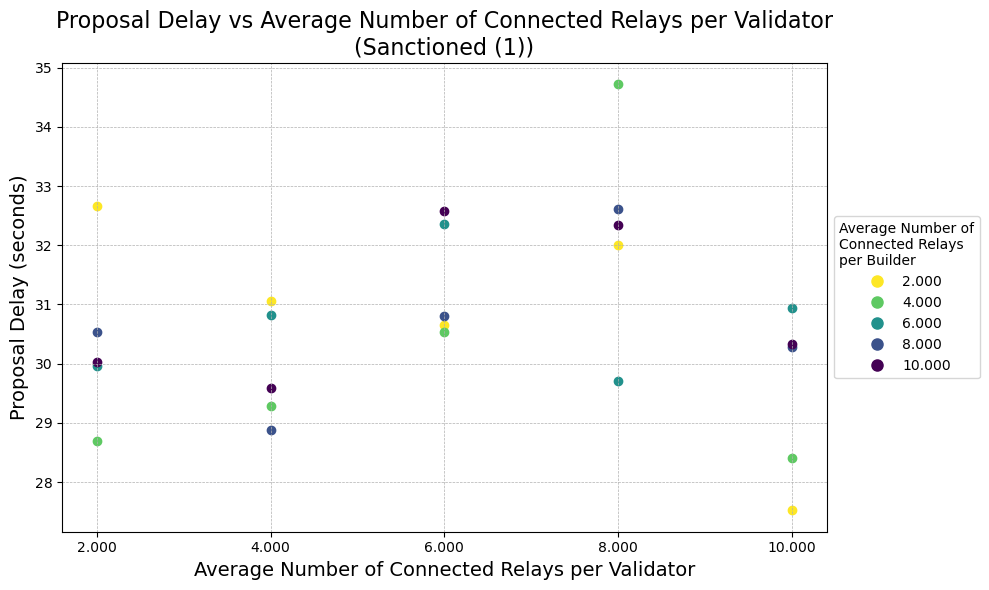

In [ ]:


avg_rb_values = sorted(final_stats['avg_rb'].unique())
colors = plt.cm.viridis(np.linspace(1, 0, len(avg_rb_values))) 

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    fig, ax = plt.subplots(figsize=(10, 6))


    unique_avg_rv = sorted(subset['avg_rv'].unique())
    avg_rv_to_pos = {avg: pos for pos, avg in enumerate(unique_avg_rv)}


    for i, avg_rb in enumerate(avg_rb_values):
        data = subset[subset['avg_rb'] == avg_rb]
        positions = [avg_rv_to_pos[rt] for rt in data['avg_rv']]
        ax.scatter(positions, data['mean'],
                   color=colors[i], marker='o', label=f'{avg_rb:.3f}', alpha=1.0)

    ax.set_xlabel('Average Number of Connected Relays per Validator', fontsize=14)
    ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)


    ax.set_xticks(range(len(unique_avg_rv)))
    ax.set_xticklabels([f'{x:.3f}' for x in unique_avg_rv])


    legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=8, label=f'{avg_rb:.3f}')
                       for i, avg_rb in enumerate(avg_rb_values)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Average Number of\nConnected Relays\nper Builder')

    plt.title(f'Proposal Delay vs Average Number of Connected Relays per Validator\n({sanctioned_type})', fontsize=16)
    plt.tight_layout()
    plt.show()


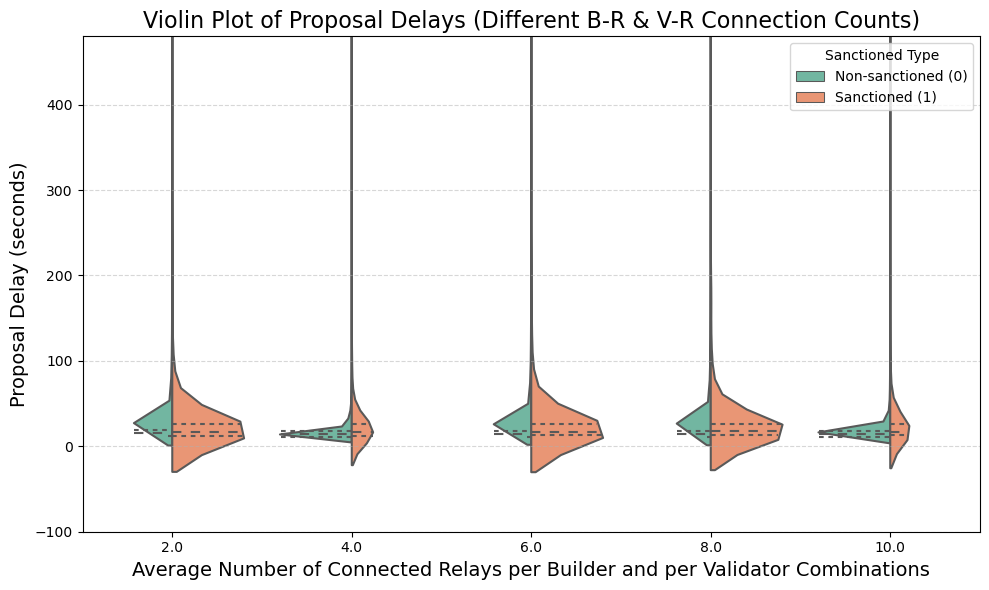

In [ ]:

selected_avgs = [2.0, 4.0, 6.0, 8.0, 10.0]

selected_data = combined_transactions[
    combined_transactions['avg_rb'].isin(selected_avgs) &
    (combined_transactions['avg_rb'] == combined_transactions['avg_rv'])
].copy()


selected_data['avg_label'] = selected_data['avg_rb'].apply(lambda x: f"{x:.1f}")

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=selected_data,
    x='avg_label',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)

plt.ylim(-100, 480)
plt.xlabel('Average Number of Connected Relays per Builder and per Validator Combinations', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays (Different B-R & V-R Connection Counts)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
####  -  avg_relays_per_builder & avg_relays_per_validator

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("avg_relays_per_builder_validator_")]


def extract_avg_rb_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        avg_rb = float(match.group(1))
        avg_rv = float(match.group(2))
        return (avg_rb, avg_rv)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_avg_rb_rv)


results = []

for folder in folders:
    avg_rb, avg_rv = extract_avg_rb_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks


        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })

 
    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'avg_rb': avg_rb,
        'avg_rv': avg_rv,
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: avg_rb_{avg_rb:.3f}_avg_rv_{avg_rv:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")


Experiment: avg_rb_2.000_avg_rv_2.000
平均含 sanctioned_type=1 交易的区块数量: 139.400000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.100000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.70%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.30%
平均空区块数量: 1.500000
空区块占所有已提议区块的比例: 0.50%

Experiment: avg_rb_2.000_avg_rv_4.000
平均含 sanctioned_type=1 交易的区块数量: 139.600000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.700000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.65%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.35%
平均空区块数量: 0.700000
空区块占所有已提议区块的比例: 0.23%

Experiment: avg_rb_2.000_avg_rv_6.000
平均含 sanctioned_type=1 交易的区块数量: 135.000000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 164.100000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.14%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.86%
平均空区块数量: 0.900000
空区块占所有已提议区块的比例: 0.30%

Experiment: avg_rb_2.000_avg_rv_8.000
平均含 sanctioned_type=1 交易的区块数量: 138.900000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.100000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.46%
不含 sanctioned_type=1 交易的

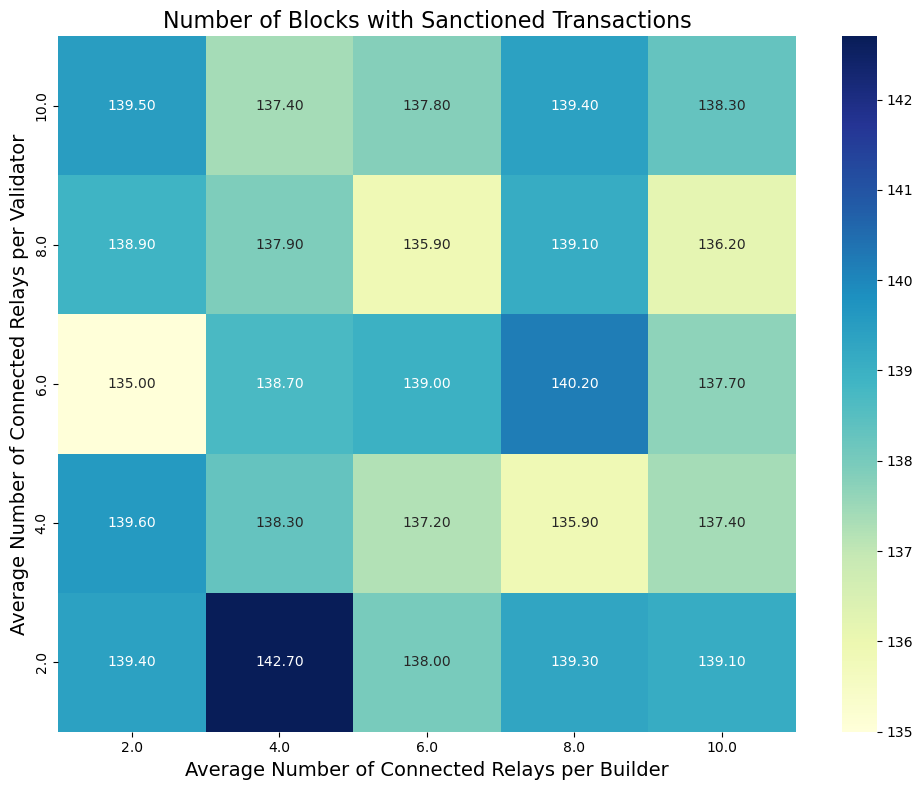

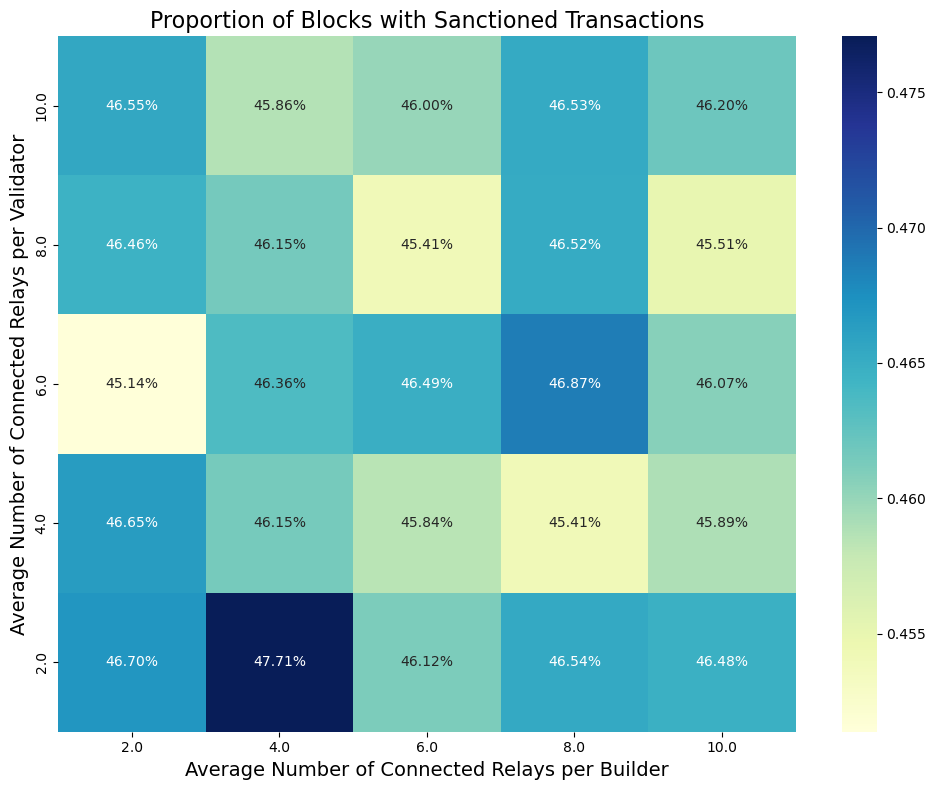

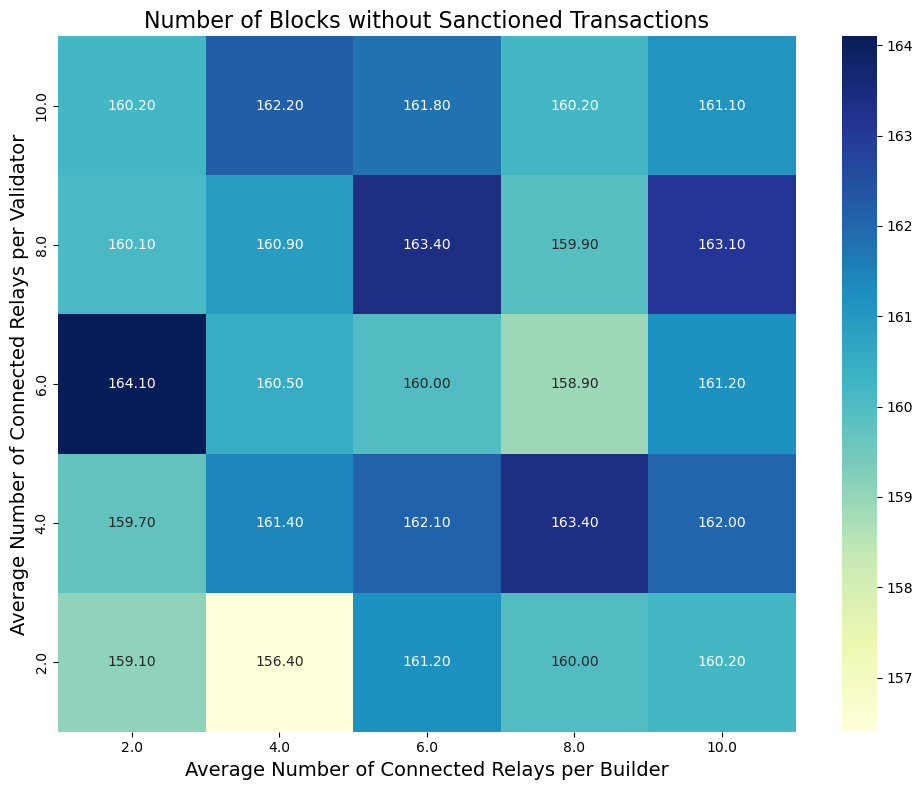

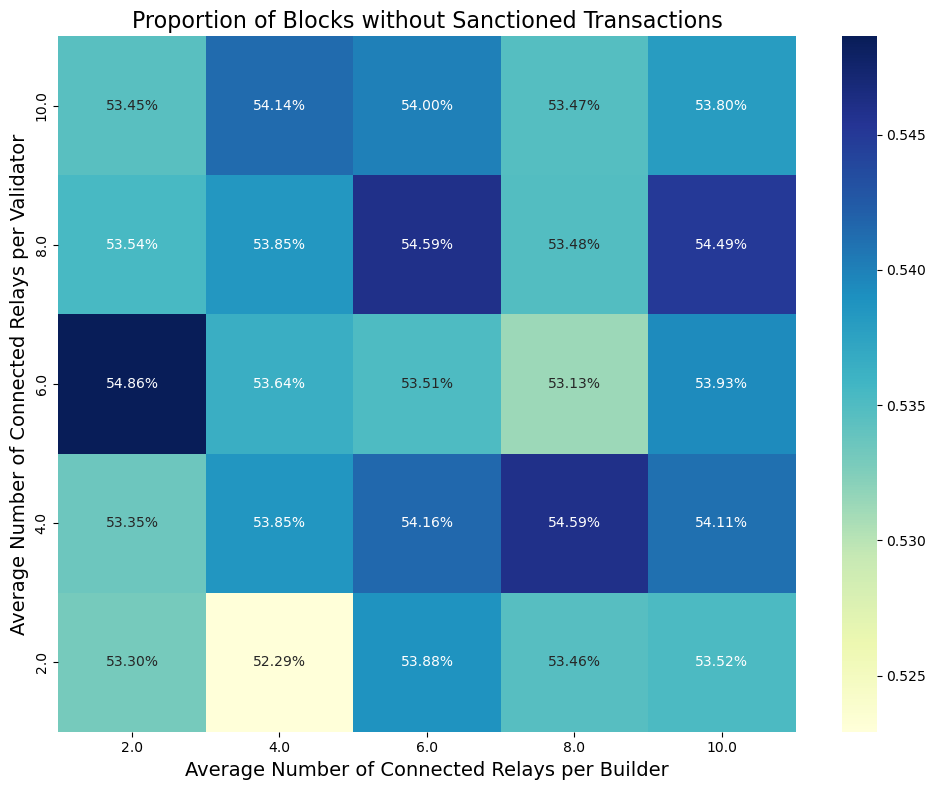

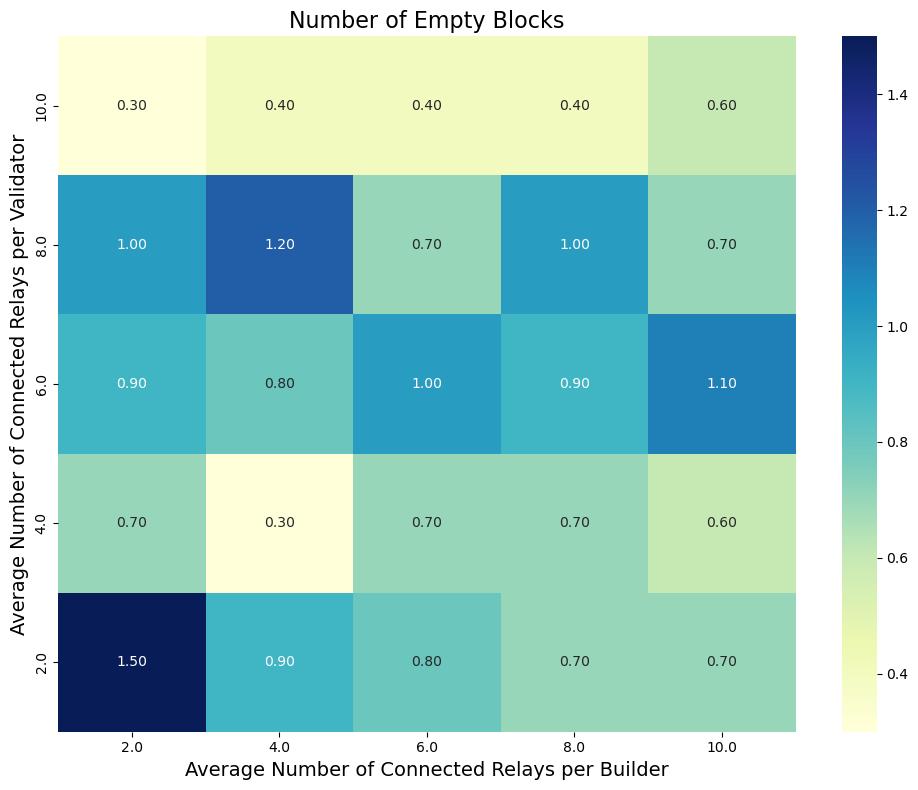

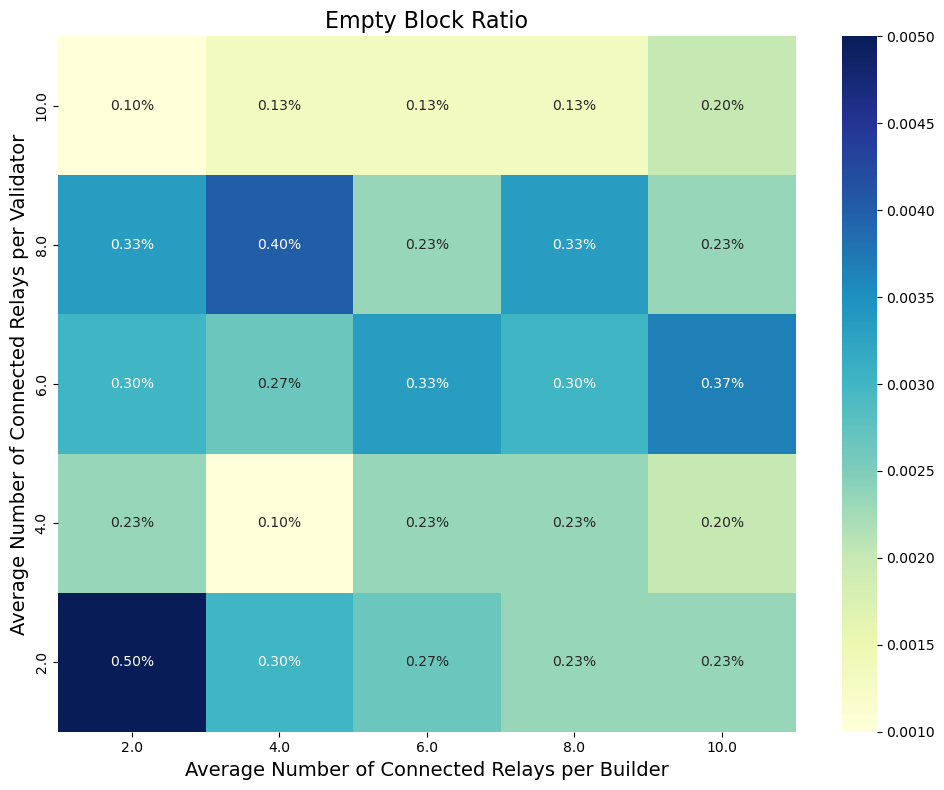

In [ ]:

results_df = pd.DataFrame(results)


def plot_heatmap(data, title, fmt):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data, annot=True, fmt=fmt, cmap="YlGnBu")
    ax.invert_yaxis()  
    plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
    plt.ylabel('Average Number of Connected Relays per Validator', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Figure 1: Number of Blocks with Sanctioned Transactions Heatmap
heatmap_data_1 = results_df.pivot(index='avg_rv', columns='avg_rb', values='avg_blocks_with_sanctioned')
plot_heatmap(heatmap_data_1, 'Number of Blocks with Sanctioned Transactions', ".2f")

# Figure 2: Proportion of Blocks with Sanctioned Transactions Heatmap
heatmap_data_2 = results_df.pivot(index='avg_rv', columns='avg_rb', values='ratio_with_sanctioned')
plot_heatmap(heatmap_data_2, 'Proportion of Blocks with Sanctioned Transactions', ".2%")

# Figure 3: Number of Blocks without Sanctioned Transactions Heatmap
heatmap_data_5 = results_df.pivot(index='avg_rv', columns='avg_rb', values='avg_blocks_without_sanctioned')
plot_heatmap(heatmap_data_5, 'Number of Blocks without Sanctioned Transactions', ".2f")

# Figure 4: Proportion of Blocks without Sanctioned Transactions Heatmap
heatmap_data_6 = results_df.pivot(index='avg_rv', columns='avg_rb', values='ratio_without_sanctioned')
plot_heatmap(heatmap_data_6, 'Proportion of Blocks without Sanctioned Transactions', ".2%")

# Figure 5: Number of Empty Blocks Heatmap
heatmap_data_3 = results_df.pivot(index='avg_rv', columns='avg_rb', values='avg_empty_blocks')
plot_heatmap(heatmap_data_3, 'Number of Empty Blocks', ".2f")

# Figure 6: Empty Block Ratio Heatmap
heatmap_data_4 = results_df.pivot(index='avg_rv', columns='avg_rb', values='empty_block_ratio')
plot_heatmap(heatmap_data_4, 'Empty Block Ratio', ".2%")



#### Total block value and mean block value   -  avg_relays_per_builder & avg_relays_per_validator

In [ ]:


def calculate_block_value_stats(exp_blocks, avg_rb, avg_rv):
    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()

    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']

    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()

    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'avg_rb': avg_rb,
        'avg_rv': avg_rv,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }

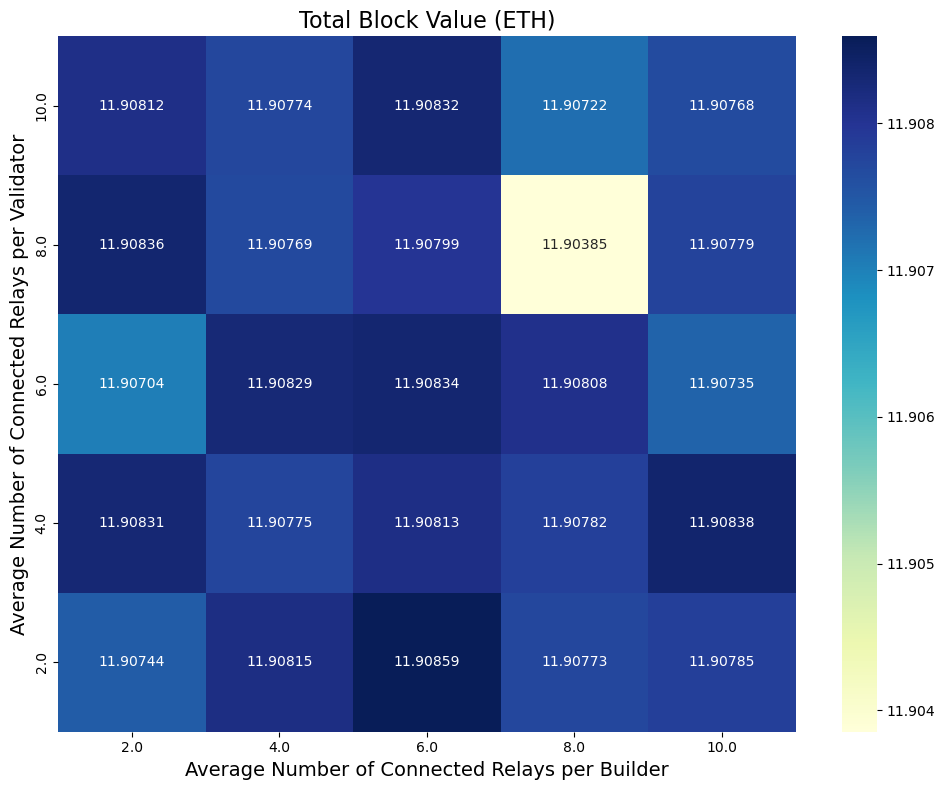

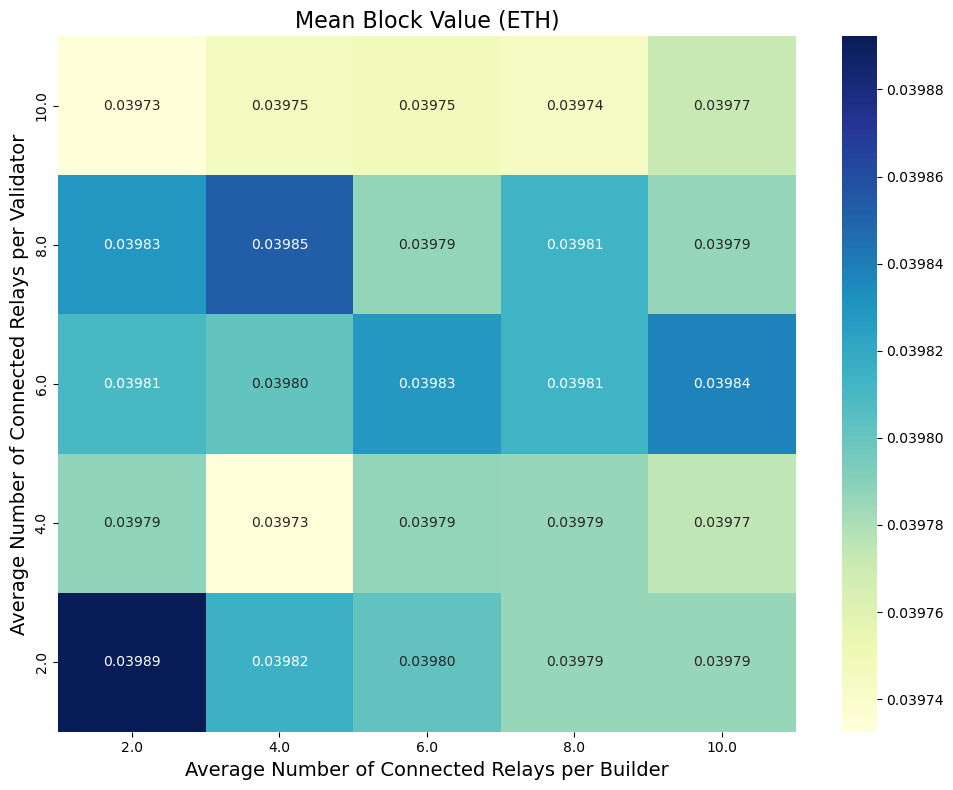

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("avg_relays_per_builder_validator_")]


def extract_avg_rb_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        avg_rb = float(match.group(1))
        avg_rv = float(match.group(2))
        return (avg_rb, avg_rv)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_avg_rb_rv)


results = []


for folder in folders:
    avg_rb, avg_rv = extract_avg_rb_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    stats = calculate_block_value_stats(blocks, avg_rb, avg_rv)
    results.append(stats)

combined_stats = pd.DataFrame(results)



def plot_heatmap(df, value_col, title, fmt=".5f"):
    pivot_df = df.pivot(index='avg_rv', columns='avg_rb', values=value_col)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu",
                     annot_kws={"fontsize": 10}, cbar_kws={'format':ScalarFormatter(useOffset=False)})

    plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
    plt.ylabel('Average Number of Connected Relays per Validator', fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



plot_heatmap(
    combined_stats,
    'avg_total_block_value_eth',
    'Total Block Value (ETH)'
)


plot_heatmap(
    combined_stats,
    'avg_mean_block_value_eth',
    'Mean Block Value (ETH)'
)


####  Average profit (per block & pre node) for builders under different censorship types  - avg_relays_per_builder & avg_relays_per_validator

In [ ]:

def calculate_builder_profit_by_policy(exp_blocks, experiment_name):

    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()


    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )


    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()


    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


   builder_policy  mean_builder_profit_per_block(ETH)  \
0             non                            0.002055   
1          strict                            0.001770   
2            weak                            0.001944   
3             non                            0.002045   
4          strict                            0.001786   
5            weak                            0.001987   
6             non                            0.002045   
7          strict                            0.001817   
8            weak                            0.001981   
9             non                            0.002038   
10         strict                            0.001804   
11           weak                            0.002009   
12            non                            0.002039   
13         strict                            0.001793   
14           weak                            0.002013   
15            non                            0.002049   
16         strict              

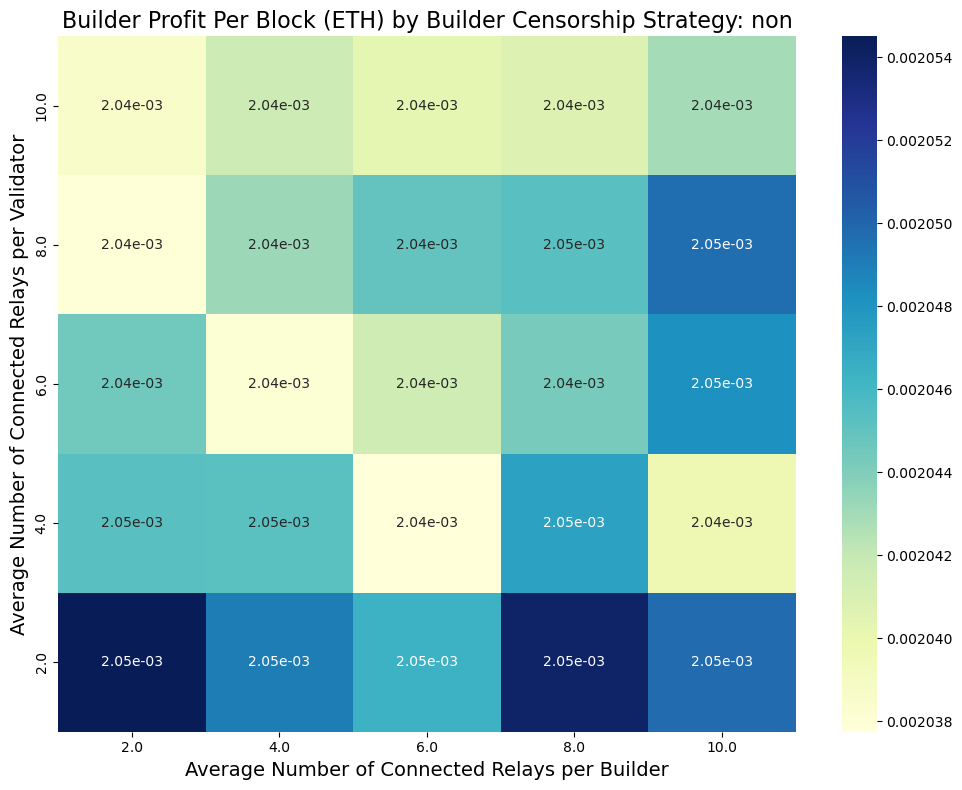

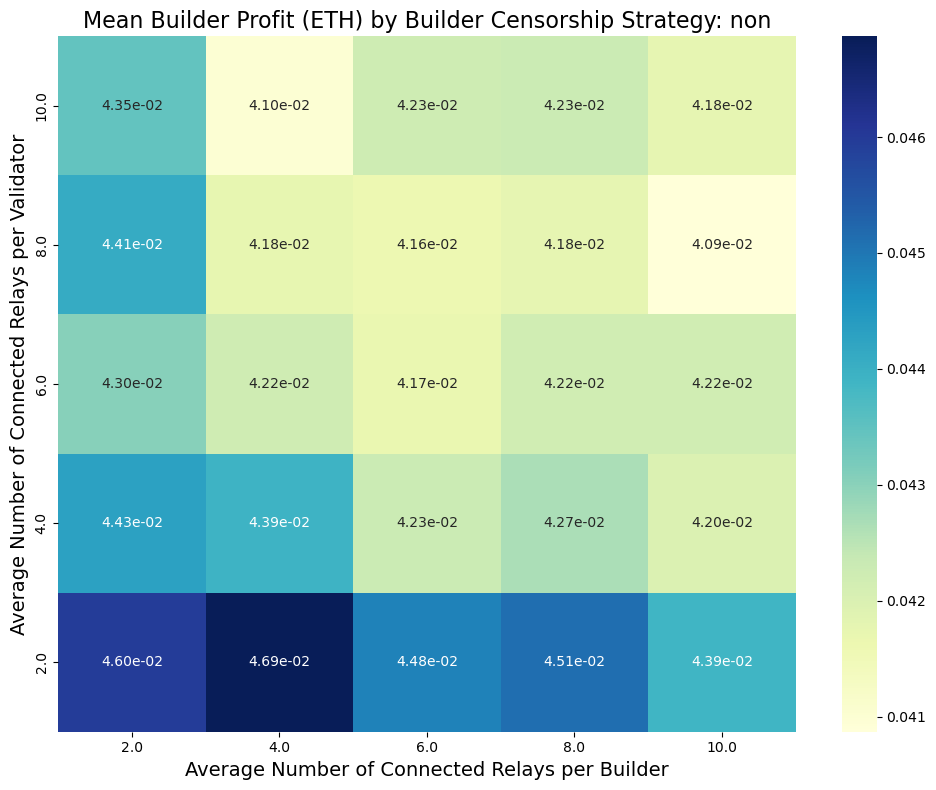

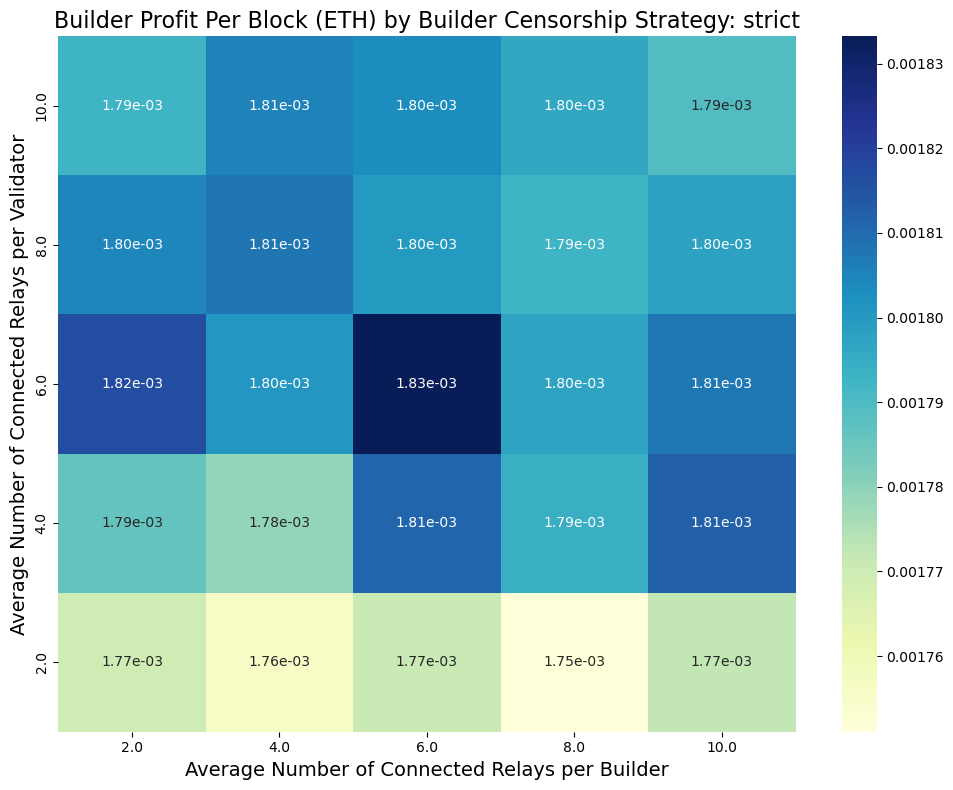

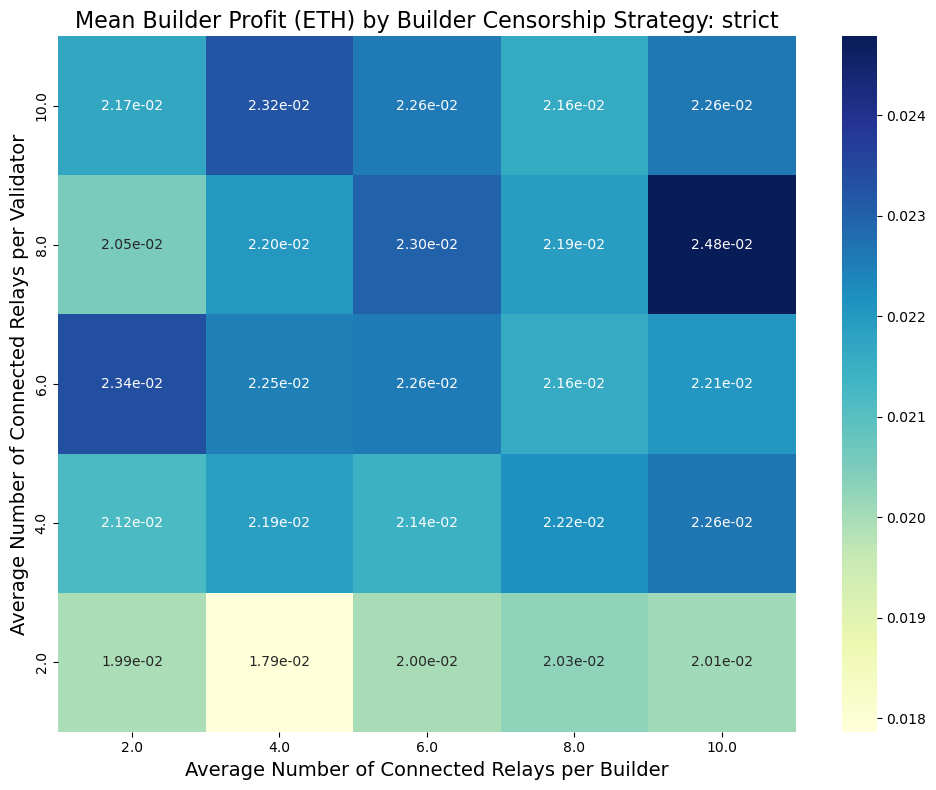

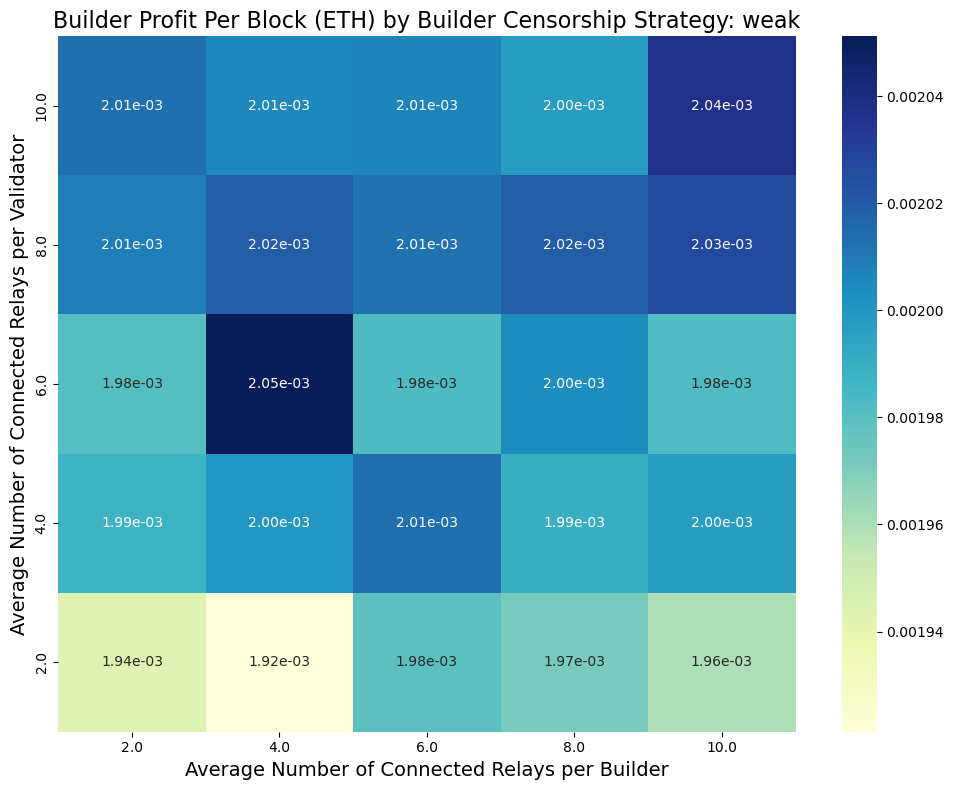

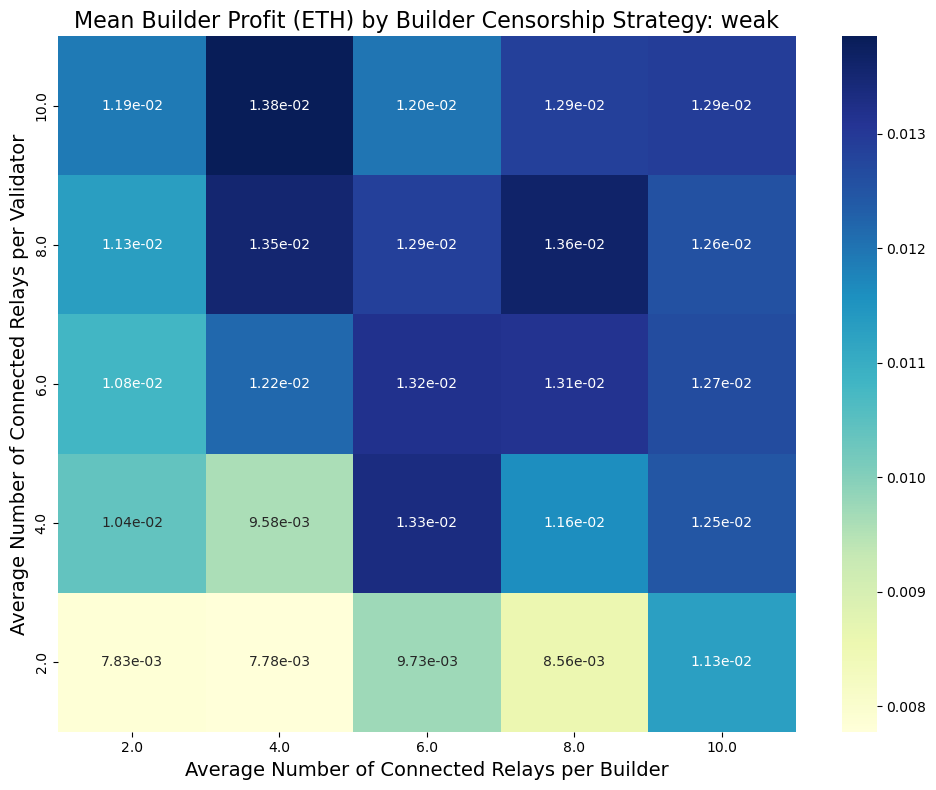

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("avg_relays_per_builder_validator_")]


def extract_avg_rb_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        avg_rb = float(match.group(1))
        avg_rv = float(match.group(2))
        return (avg_rb, avg_rv)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_avg_rb_rv)


results = []


for folder in folders:
    avg_rb, avg_rv = extract_avg_rb_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

 
    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    experiment_label = f'cbrr_{avg_rb:.3f}_cvrr_{avg_rv:.3f}'
    stats = calculate_builder_profit_by_policy(blocks, experiment_label)
    stats['avg_rb'] = avg_rb
    stats['avg_rv'] = avg_rv
    results.append(stats)


combined_stats = pd.concat(results, ignore_index=True)


print(combined_stats.sort_values(['avg_rb', 'avg_rv', 'builder_policy']))



def plot_heatmap(df, policy, value_col, title, fmt=".2e"):
    pivot_df = df[df['builder_policy'] == policy].pivot(
        index='avg_rv', columns='avg_rb', values=value_col)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu")
    plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
    plt.ylabel('Average Number of Connected Relays per Validator', fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


policies = combined_stats['builder_policy'].unique()

for policy in policies:

    plot_heatmap(
        combined_stats, policy, 'mean_builder_profit_per_block(ETH)',
        f'Builder Profit Per Block (ETH) by Builder Censorship Strategy: {policy}'
    )


    plot_heatmap(
        combined_stats, policy, 'mean_builder_profit_per_builder(ETH)',
        f'Mean Builder Profit (ETH) by Builder Censorship Strategy: {policy}'
    )


####  Average profit (per block & pre node) for validators under different censorship types - avg_relays_per_builder & avg_relays_per_validator

In [51]:
def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]

    proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                             False                              0.039190   
1                              True                              0.032479   
2                             False                              0.039148   
3                              True                              0.032210   
4                             False                              0.039205   
5                              True                              0.032091   
6                             False                              0.039185   
7                              True                              0.032220   
8                             False                              0.039078   
9                              True                              0.032258   
10                            False                              0.039183   
11                             True                              0.032202   

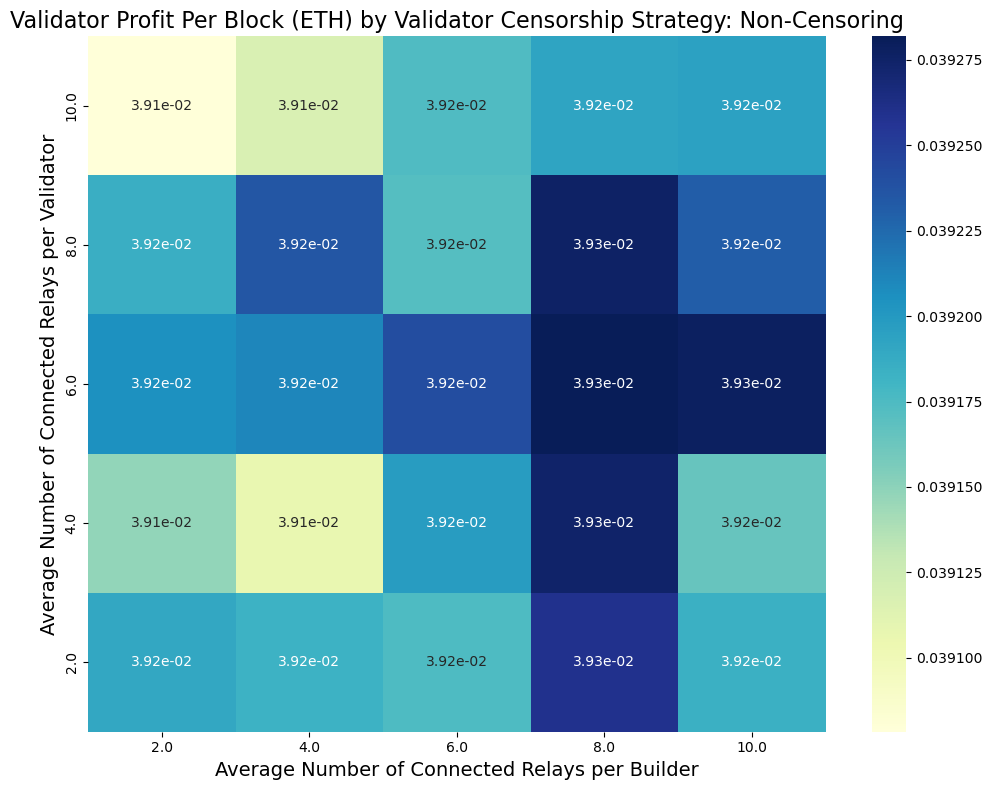

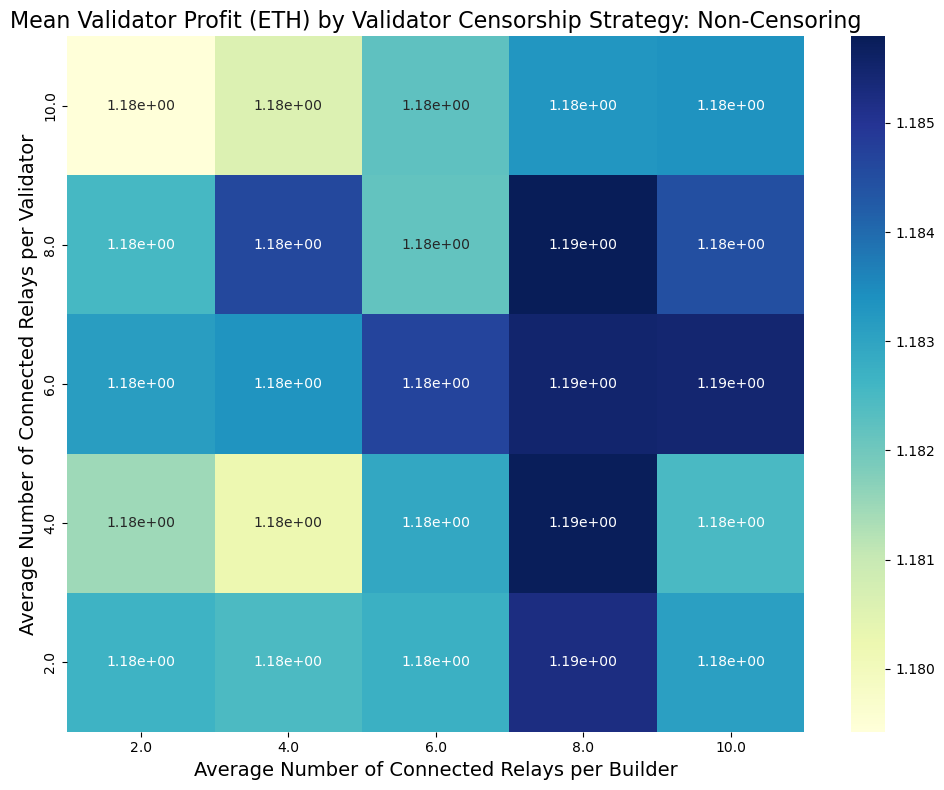

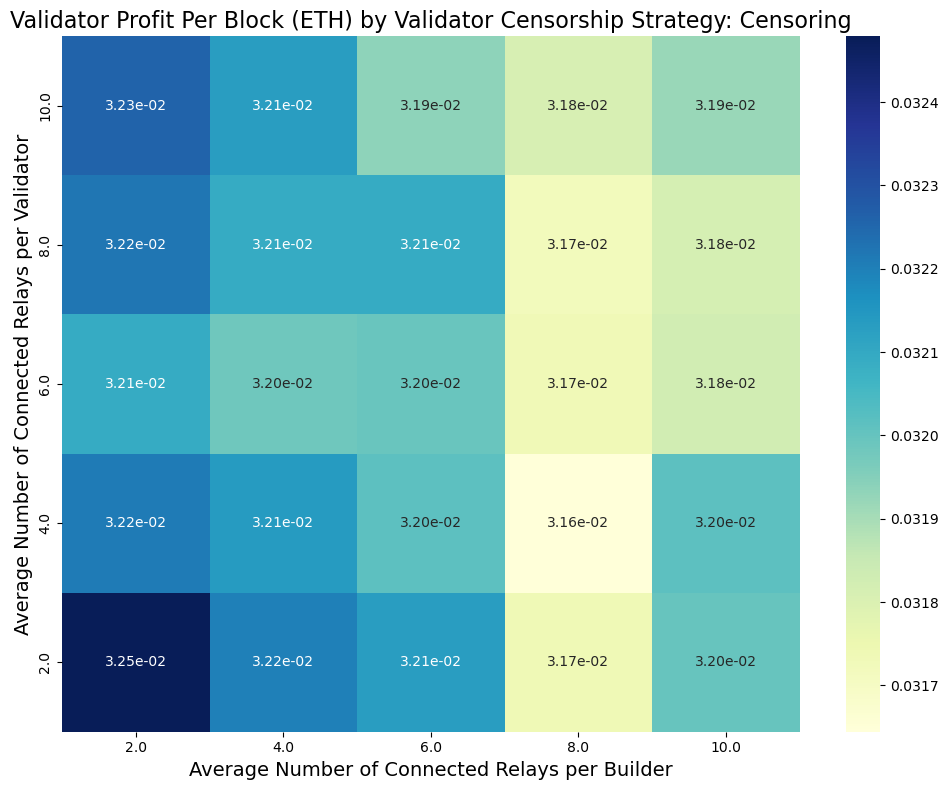

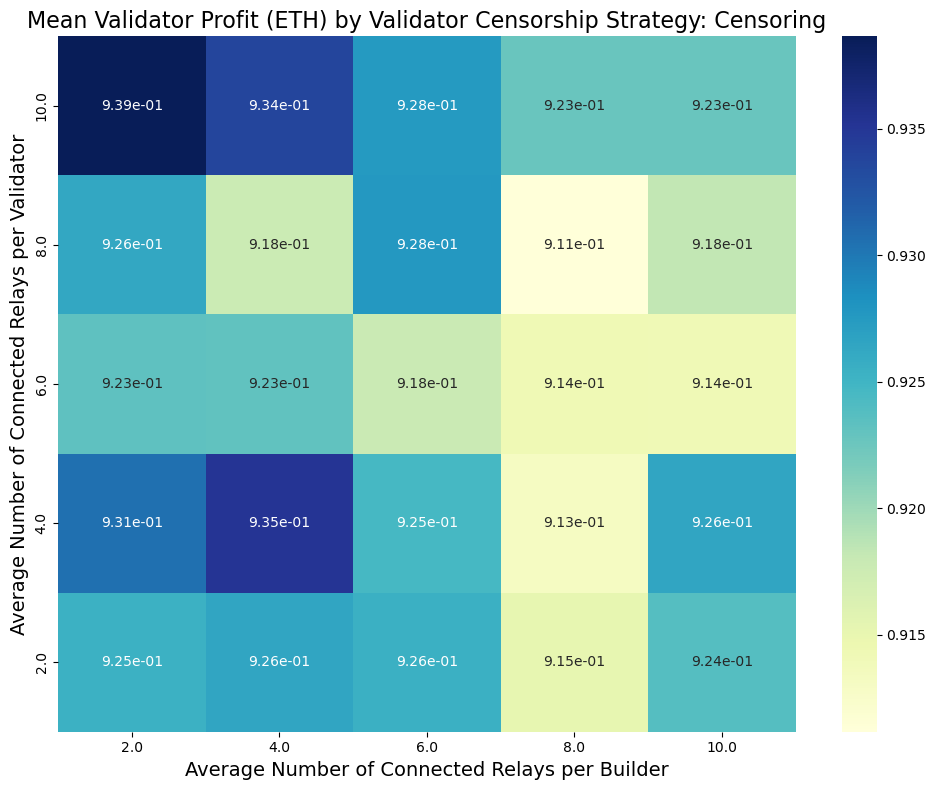

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_avg_relays_per_builder_validator_20250614_114259"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("avg_relays_per_builder_validator_")]


def extract_avg_rb_rv(folder_name):
    match = re.search(r"avg_relays_per_builder_validator_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        avg_rb = float(match.group(1))
        avg_rv = float(match.group(2))
        return (avg_rb, avg_rv)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_avg_rb_rv)


results = []


for folder in folders:
    avg_rb, avg_rv = extract_avg_rb_rv(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    experiment_label = f'cbrr_{avg_rb:.3f}_cvrr_{avg_rv:.3f}'
    stats = calculate_validator_profit_by_policy(blocks, experiment_label)
    stats['avg_rb'] = avg_rb
    stats['avg_rv'] = avg_rv
    results.append(stats)


combined_stats = pd.concat(results, ignore_index=True)


print(combined_stats.sort_values(['avg_rb', 'avg_rv', 'proposer_validator_is_censoring']))



def plot_validator_heatmap(df, is_censoring, value_col, title, fmt=".2e"):
    pivot_df = df[df['proposer_validator_is_censoring'] == is_censoring].pivot(
        index='avg_rv', columns='avg_rb', values=value_col)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu")
    plt.xlabel('Average Number of Connected Relays per Builder', fontsize=14)
    plt.ylabel('Average Number of Connected Relays per Validator', fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


policies = combined_stats['proposer_validator_is_censoring'].unique()

for policy in policies:
    policy_label = 'Censoring' if policy else 'Non-Censoring'


    plot_validator_heatmap(
        combined_stats, policy, 'mean_validator_profit_per_block(ETH)',
        f'Validator Profit Per Block (ETH) by Validator Censorship Strategy: {policy_label}'
    )


    plot_validator_heatmap(
        combined_stats, policy, 'mean_validator_profit_per_validator(ETH)',
        f'Mean Validator Profit (ETH) by Validator Censorship Strategy: {policy_label}'
    )
